# Data Reading

In [22]:
# List file data
import glob

path = 'Data'

files = [f[5:] for f in glob.glob(path + "/*.xlsx", recursive=True)]

for f in files:
    print(f)


C2015-10 Tax Return System (1).xlsx
C2015-11 Staff Authorization System.xlsx
C2015-12 Premium Payment System.xlsx
C2015-13 Broker Account Conversion System.xlsx
C2015-14 Supplementary Pensions Database.xlsx
C2015-15 FACTA System.xlsx
C2015-17 Insurance Bundling System.xlsx
C2015-18 Tax Return System (2).xlsx
C2015-20 Policy Numbering System.xlsx
C2015-21 Investment Product (1).xlsx
C2015-22 Risk Profile Questionnaire.xlsx
C2015-23 Investment Product (2).xlsx
C2015-24 CRM System.xlsx
C2015-25 Beer Tasting.xlsx
C2015-26 Debt Collection System.xlsx
C2015-28 Website Tennis Vlaanderen.xlsx
C2016-08 SCM System.xlsx
C2016-09 Data Loss Prevention System.xlsx


In [23]:
import pandas 

dfs = [pandas.read_excel('Data/'+file, sheet_name=None, skiprows=1) for file in files]
sheetnames = [list(df.keys()) for df in dfs]


In [24]:
def parse_date(date):
    elms = date.split()
    total_hour = 0
    for elm in elms:
        if elm.endswith("d"):
            total_hour += int(elm[:-1])*24
        elif elm.endswith("h"):
            total_hour += int(elm[:-1])
    return total_hour

def find_column_indices(header, col_names):
    indices = []
    for name in col_names:
        for i, h in enumerate(header):
            if h == name:
                indices.append(i)
    return indices

In [25]:
import numpy as np

baselines = [dfs[i]['Baseline Schedule'][['ID', 'Duration', 'Total Cost']].values for i in range(0, np.size(files))]


In [26]:
# project id
id = 0

# planned duration
PD = [parse_date(baselines[i][0][1]) for i in range(0, np.size(files))]

# planned budget
BAC = [baselines[i][0][2] for i in range(0, np.size(files))]

print("PD:", PD)
print("BAC: ", BAC)


PD: [2040, 1320, 4416, 2808, 2977, 1368, 4996, 3072, 4104, 888, 3626, 2908, 5592, 317, 3556, 4824, 17400, 4680]
BAC:  [18990, 14400, 132570, 12735, 34260, 11700, 281430, 39450, 12645, 4020, 29880, 46920, 44130, 1210, 458112.368399999, 219275, 375253.343053818, 584951.768859863]


In [27]:
# tracking periods
tracking_periods = [[x for x in sheetnames[i] if "TP" in x] for i in range(0, np.size(files))]
n_tracking_periods = [len(tracking_periods[i]) for i in range(0, np.size(files))]
print("Number of tracking periods:", n_tracking_periods)


Number of tracking periods: [3, 3, 3, 4, 4, 3, 5, 3, 4, 2, 4, 4, 6, 3, 5, 4, 34, 9]


In [28]:
import plotly.graph_objects as go

# Ve bang
fig = go.Figure(
    layout = dict(height=1500),
    data=[go.Table(
        columnwidth = [100,500,200],
        header=dict(values=['ID', 'Project Name', 'BAC', 'Duration(months)', 'Number of Tracking'],
                line_color='black',
                fill_color='white',
                align='center'),
        cells=dict(values=[list(range(0, np.size(files))), files,
                           [float(int(bac*10000))/10000 for bac in BAC],
                           [float(int(d/24/30*10000))/10000 for d in PD],
                           n_tracking_periods],
                line_color='black',
                fill_color='white',
                align='center'
            )
    )]
)

fig.show()


In [29]:
import numpy as np

# Col 0 = ID, col 12 = Duration
beta = 0.15

ATs = []
EVs = []
PVs = []
ACs = []
DAC = []
CAC = []

for i in range(0, np.size(files)):
    ATx = [0]
    EVx = [0]
    PVx = [0]
    ACx = [0]

    print ("Project: ", i)
    for period in tracking_periods[i]:
        cols = find_column_indices(dfs[i][period].values[1], ["ID", "Actual Duration", "Actual Cost", "Earned Value (EV)", "Planned Value (PV)"])
        data_period = dfs[i][period].values[2:, cols]

#        assert (baselines[:,0] == data_period[:,0]).sum() == len(baselines), "Wrong permutation!"

        AT = parse_date(data_period[id][1])
        AC = data_period[id][2]
        EV = data_period[id][3]
        PV = data_period[id][4]

        print("   ", period, " AT=", AT, " AC=", AC, " EV=", EV, " PV=", PV)

        ATx.append(AT)
        ACx.append(AC)
        PVx.append(PV)
        EVx.append(EV)

    print()

    DACx = ATx[n_tracking_periods[i]]
    CACx = ACx[n_tracking_periods[i]]

    print("   Actual duration: ", DACx, " Cost at complete: ", CACx)

    ATs.append(ATx)
    EVs.append(EVx)
    PVs.append(PVx)
    ACs.append(ACx)
    DAC.append(DACx)
    CAC.append(CACx)
    

Project:  0
    Project Control - TP1  AT= 360  AC= 1350  EV= 3132.29998737574  PV= 4215
    TP2  AT= 840  AC= 6045  EV= 12275.5263715982  PV= 11490
    TP3  AT= 2040  AC= 8010  EV= 18990  PV= 18990

   Actual duration:  2040  Cost at complete:  8010
Project:  1
    Project Control - TP1  AT= 384  AC= 3960  EV= 6009.00001823902  PV= 10425
    TP2  AT= 864  AC= 7935  EV= 13311.0000193119  PV= 13350
    TP3  AT= 1303  AC= 9105  EV= 14400  PV= 14400

   Actual duration:  1303  Cost at complete:  9105
Project:  2
    Project Control - TP1  AT= 480  AC= 13995  EV= 28045.7998844236  PV= 65625
    TP2  AT= 1080  AC= 47835  EV= 91958.7003171444  PV= 103395
    TP3  AT= 4399  AC= 58410  EV= 132570  PV= 132570

   Actual duration:  4399  Cost at complete:  58410
Project:  3
    Project Control - TP1  AT= 912  AC= 1185  EV= 1278.00003346056  PV= 3210
    TP2  AT= 1399  AC= 4560  EV= 5750.70000026375  PV= 8835
    TP3  AT= 2112  AC= 8790  EV= 10845.1499274373  PV= 11760
    TP4  AT= 2791  AC= 9990

In [30]:
ATNs = []
PVNs = []
ACNs = []
EVNs = []

for i in range(0, np.size(files)):
    ATNx = [0]
    ACNx = [0]
    PVNx = [0]
    EVNx = [0]

    print ("Project: ", i)
    for j in range(1, n_tracking_periods[i] + 1):
        ATN = ATs[i][j]/PD[i]
        ACN = ACs[i][j]/BAC[i]
        PVN = PVs[i][j]/BAC[i]
        EVN = EVs[i][j]/BAC[i]

        print("   ", tracking_periods[i][j - 1], " ATN=", ATN, " ACN=", ACN, " PVN=", PVN, " EVN=", EVN)

        ATNx.append(ATN)
        ACNx.append(ACN)
        PVNx.append(PVN)
        EVNx.append(EVN)
    
    ATNs.append(ATNx)
    ACNs.append(ACNx)
    PVNs.append(PVNx)
    EVNs.append(EVNx)


Project:  0
    Project Control - TP1  ATN= 0.17647058823529413  ACN= 0.07109004739336493  PVN= 0.22195892575039494  EVN= 0.16494470707613165
    TP2  ATN= 0.4117647058823529  ACN= 0.3183254344391785  PVN= 0.6050552922590837  EVN= 0.6464205566929015
    TP3  ATN= 1.0  ACN= 0.4218009478672986  PVN= 1.0  EVN= 1.0
Project:  1
    Project Control - TP1  ATN= 0.2909090909090909  ACN= 0.275  PVN= 0.7239583333333334  EVN= 0.41729166793326533
    TP2  ATN= 0.6545454545454545  ACN= 0.5510416666666667  PVN= 0.9270833333333334  EVN= 0.9243750013411042
    TP3  ATN= 0.9871212121212121  ACN= 0.6322916666666667  PVN= 1.0  EVN= 1.0
Project:  2
    Project Control - TP1  ATN= 0.10869565217391304  ACN= 0.10556687033265445  PVN= 0.4950214980764879  EVN= 0.2115546495015735
    TP2  ATN= 0.24456521739130435  ACN= 0.3608282416836388  PVN= 0.7799275854265671  EVN= 0.6936614642614799
    TP3  ATN= 0.9961503623188406  ACN= 0.44059742023082143  PVN= 1.0  EVN= 1.0
Project:  3
    Project Control - TP1  ATN= 0.3

# Cost forecasting

In [31]:
print("Project actual cost: ", CAC)

# Calc SPI
SPI = [[EVs[i][t]/PVs[i][t] if t!= 0 else 1.0 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
CPI = [[EVs[i][t]/ACs[i][t] if t!= 0 else 1.0 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
CR  = [[CPI[i][t]*SPI[i][t] if t!= 0 else 1.0 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
CI  = [[0.8*CPI[i][t]+0.2*SPI[i][t] if t!= 0 else 1.0 for t in range(0, n_tracking_periods[i])] for i in range(0, np.size(files))]

print ('SPI=', SPI)
print ('CPI=', CPI)
print ('CR=', CR)
print ('CI=', CI)


Project actual cost:  [8010, 9105, 58410, 9990, 18285, 7035, 281070, 25380, 11100, 3240, 17400, 32805, 36870, 1780, 512546.14605017, 382475, 438741.660275459, 1425155.96141052]
SPI= [[1.0, 0.7431316696027853, 1.0683660897822629, 1.0], [1.0, 0.576402879447388, 0.9970786531319775, 1.0], [1.0, 0.4273645696674072, 0.8893921400178383, 1.0], [1.0, 0.3981308515453458, 0.6508998302505659, 0.9222066264827636, 1.0], [1.0, 0.2778877873625302, 0.6397887261610633, 0.8300562685100845, 1.0021939447125932], [1.0, 0.6895652219005246, 0.9777142865317238, 1.0985915492957747], [1.0, 0.20496083406473714, 0.3915927218945789, 0.6511959433897528, 0.807088963033315, 1.0], [1.0, 0.3940896818990667, 0.6469638557678233, 1.0], [1.0, 0.8919335656035983, 0.9345670258305971, 0.9943060484645235, 1.0], [1.0, 1.057884619786189, 1.0], [1.0, 0.13213644603424535, 0.5789970787497787, 0.6533617253522933, 1.0152905198776758], [1.0, 0.7948717948717948, 0.6852856248299142, 0.938021870205306, 1.0195567144719686], [1.0, 2.2548000

In [32]:
### Calc ggm

# Ham gompertz
#from scipy.stats import gompertz

def gompertz(t, alpha, beta, gamma):
    return alpha*np.exp(-np.exp(beta-t*gamma))

def gompertz_dis(t, alpha, beta, gamma):
    return alpha*gamma*np.exp(beta-t*gamma)*gompertz(t, alpha, beta, gamma)

def gompertz_r(params, x, y):
    ret = []
    for i in range(0, np.size(x)):
        ret.append(gompertz(x[i], params[0], params[1], params[2]) - y[i])
    return ret

from scipy.optimize import least_squares

# Regression
alphas = []
betas  = []
gammas = []

alphas2 = []
betas2  = []
gammas2 = []

for i in range(0, np.size(files)):
    print ("Project: ", i)

    alphax = []
    betax  = []
    gammax = []
    for j in range(0, n_tracking_periods[i] + 1):
        # Response
        RP = [ACNs[i][t] if t <= j else PVNs[i][t] for t in range(0, n_tracking_periods[i]+1)]

        # standard least_square
        x0 = np.ones(3)
        lsq = least_squares(gompertz_r, x0, args=(ATNs[i], RP))

        # robust least squares
        #x1 = np.ones(3)
        #res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

        ## Tham so dau vao [narbaev2014]
        alpha = lsq.x[0]
        beta  = lsq.x[1]
        gamma = lsq.x[2]

        alphax.append(alpha)
        betax.append(beta)
        gammax.append(gamma)

    alphas.append(alphax)
    betas.append(betax)
    gammas.append(gammax)

    
# NEW
for i in range(0, np.size(files)):
    print ("Project: ", i)

    alphax = []
    betax  = []
    gammax = []
    for j in range(0, n_tracking_periods[i] + 1):
        # Response
        
        RP = [ACNs[i][t] if t <= j else (ACNs[i][j] + (PVNs[i][t] - EVNs[i][j])/CPI[i][j] ) for t in range(0, n_tracking_periods[i] + 1)]
        RP1 = [ACNs[i][t] if t <= j else PVNs[i][t] for t in range(0, n_tracking_periods[i]+1)]
        RP2 = ACNs[i][0:j+1]
    
        # standard least_square
        x0 = np.array([1, 1, 1])
        #upbound = np.array([np.inf, np.inf, 10])
        #lowbound = np.array([-np.inf, -np.inf, -np.inf])
        lsq = least_squares(gompertz_r, x0, args=(ATNs[i] + ATNs[i][0:j+1] + ATNs[i][0:j+1] + ATNs[i][0:j+1] + ATNs[i][0:j+1] , 
                                                  RP + RP2 + RP2 + RP2 + RP2 ))
        
        # robust least squares
        #x1 = np.ones(3)
        #res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

        ## Tham so dau vao [narbaev2014]
        alpha = lsq.x[0]
        beta  = lsq.x[1]
        gamma = lsq.x[2]

        alphax.append(alpha)
        betax.append(beta)
        gammax.append(gamma)

    alphas2.append(alphax)
    betas2.append(betax)
    gammas2.append(gammax)
    
print(gammas2[8])


Project:  0
Project:  1
Project:  2
Project:  3
Project:  4
Project:  5
Project:  6
Project:  7
Project:  8
Project:  9
Project:  10
Project:  11
Project:  12
Project:  13
Project:  14
Project:  15
Project:  16
Project:  17
Project:  0
Project:  1
Project:  2
Project:  3
Project:  4
Project:  5
Project:  6
Project:  7
Project:  8
Project:  9
Project:  10
Project:  11
Project:  12
Project:  13
Project:  14
Project:  15
Project:  16
Project:  17
[142.32525415667618, 44.979928539040095, 31.633477172259393, 29.26911929172465, 28.29559048748559]


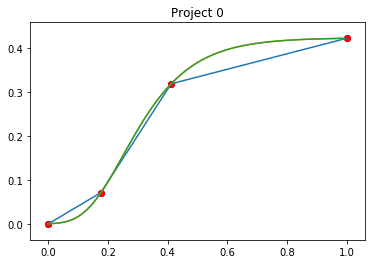

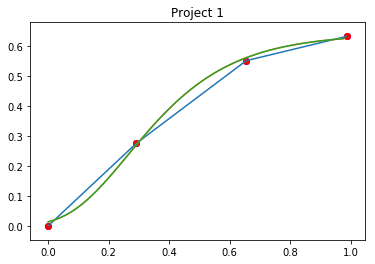

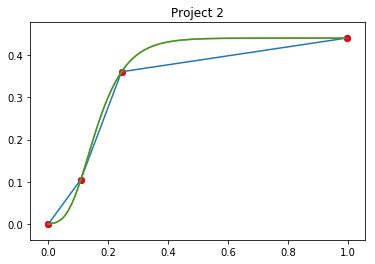

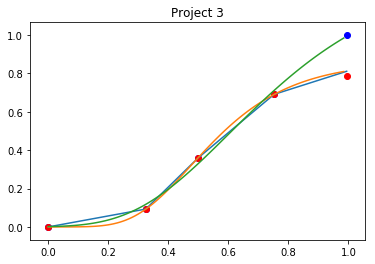

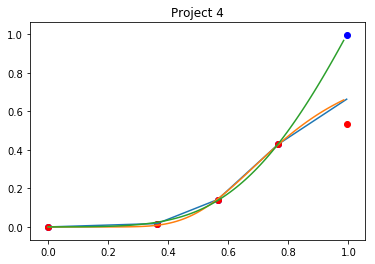

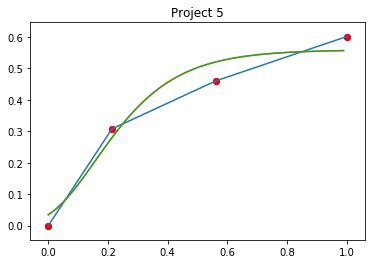

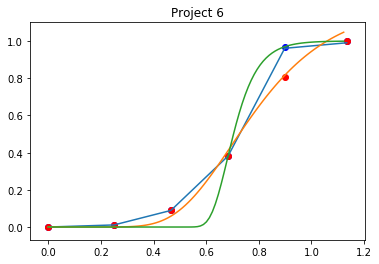

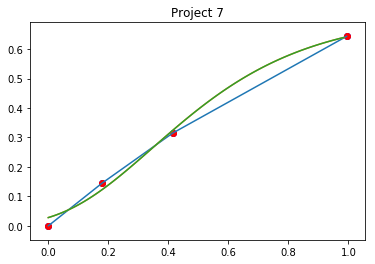

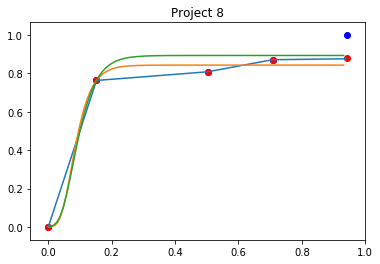

IndexError: list index out of range

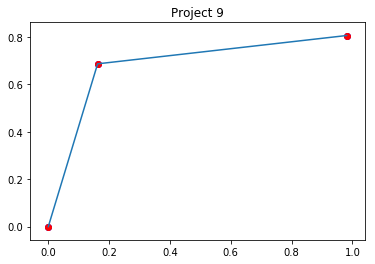

In [33]:
import matplotlib.pyplot as plt


for i in range(0, np.size(files)):
#for i in range(0,19):
    # Ve hinh regression
    plt.title('Project %d' % i)

    # Biểu diễn sự phân bố tập dữ liệu input
    # c: color
    T = 3
    RP = [ACNs[i][t] if t <= T else PVNs[i][t] for t in range(0, n_tracking_periods[i]+1)]
    RP1 = [ACNs[i][t] if t <= T else (ACNs[i][T] + (PVNs[i][t] - EVNs[i][T])/CPI[i][T] ) for t in range(0, n_tracking_periods[i]+1)]
    
    plt.scatter(ATNs[i], RP, c='b')
    plt.scatter(ATNs[i], ACNs[i], c='r')
    plt.plot(ATNs[i], RP1)
    #plt.plot(np.array([1.0/SPI[i][T],1.0/SPI[i][T]]),np.array([0, 1]) )
 
    # Đường thẳng hồi quy
    xpl = np.arange(100) / 100 * ATNs[i][-1]
    plt.plot(xpl, [gompertz(t, alphas2[i][T], betas2[i][T], gammas2[i][T]) for t in xpl])
    plt.plot(xpl, [gompertz(t, alphas[i][T], betas[i][T], gammas[i][T]) for t in xpl])
    plt.show()



In [34]:
# Calc CEAC
CEAC_EVM1 = [[ACs[i][t] + BAC[i] - EVs[i][t] for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_EVM1=', CEAC_EVM1)

# Calc CEAC
CEAC_EVM2 = [[ACs[i][t] + (BAC[i] - EVs[i][t])/CPI[i][t] for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_EVM2=', CEAC_EVM2)

# Calc CEAC
CEAC_EVM3 = [[ACs[i][t] + (BAC[i] - EVs[i][t])/CPI[i][t]/SPI[i][t] for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_EVM3=', CEAC_EVM3)


CEAC_EVM1= [[18990, 17207.70001262426, 12759.4736284018, 8010], [14400, 12350.999981760979, 9023.9999806881, 9105], [132570, 118519.2001155764, 88446.2996828556, 58410], [12735, 12641.99996653944, 11544.29999973625, 10679.8500725627, 9990], [34260, 33597.0000064373, 33684.00005310774, 26849.8501628637, 18285], [11700, 10541.999968886379, 6818.9999914169, 7035], [281430, 282225.00001659617, 281387.9994727112, 280468.660155796, 287855.500423014, 281070], [39450, 38588.85007023811, 35745.5999913812, 25380], [12645, 11011.5000629425, 11042.3999583721, 11082.0000171661, 11100], [4020, 3479.39998626709, 3240], [29880, 29825.99999338388, 28565.550001859658, 26890.6410813332, 17400], [46920, 46920, 41390.0999946892, 31665.749935805798, 32805], [44130, 43087.7999894321, 41708.25012378394, 40212.6003020257, 35817.9004966468, 37832.5502282381, 36870], [1210, 1480, 1780, 1780], [458112.368399999, 500032.36969458906, 513660.53217889403, 508034.932609118, 510102.80233826896, 512546.14605016995], [21

In [35]:
# Calc CEAC
CEAC_GGM1 = [[ACs[i][t] + (gompertz(1.0, alphas[i][t], betas[i][t], gammas[i][t])
                           -gompertz(ATNs[i][t], alphas[i][t], betas[i][t], gammas[i][t]))*BAC[i]
              for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_GGM1=', CEAC_GGM1)

# Calc CEAC
CEAC_GGM2 = [[ACs[i][t] + (gompertz(1.0/SPI[i][t], alphas[i][t], betas[i][t], gammas[i][t])
                           -gompertz(ATNs[i][t], alphas[i][t], betas[i][t], gammas[i][t]))*BAC[i]
              for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_GGM2=', CEAC_GGM2)

# Calc CEAC

CEAC_GGM3 = [[ACs[i][t] + (gompertz(1.0, alphas2[i][t], betas2[i][t], gammas2[i][t])
                           -gompertz(ATNs[i][t], alphas2[i][t], betas2[i][t], gammas2[i][t]))*BAC[i] 
              for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]

#CEAC_GGM3 = [[gompertz(1.0, alphas[i][t], betas[i][t], gammas[i][t])*BAC[i]
#           for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('CEAC_GGM3=', CEAC_GGM3)


CEAC_GGM1= [[18468.596060984928, 18990.017557648353, 18977.631081028143, 8010.0], [13831.967530628144, 14408.859050289344, 14092.340006067152, 9118.888177798943], [121217.52236568356, 132570.01024181, 132392.6807243079, 58410.01183533986], [12572.786357413295, 12355.169710670514, 12658.153573129386, 12454.116434989763, 10006.236114760004], [35074.92557985304, 34840.93269964307, 34244.43764919751, 34705.39252953862, 18320.304268339263], [10579.646075321278, 10649.999999774738, 10056.609195858939, 7035.0], [275114.78582524124, 276238.22215102764, 282480.80768932705, 279909.6967738148, 260982.0867972084, 251229.1665474142], [35428.88089604894, 39481.50467360012, 39279.38227294176, 25432.396730686687], [12644.999980298076, 12644.999921057752, 10215.918722387352, 11010.001656649341, 11100.00000019188], [4019.921315194247, 4020.0000056002004, 3240.0000001338467], [30161.33767584004, 29630.08124690347, 29430.00130116275, 28691.3278593207, 17400.0], [46023.01036857817, 48348.01036837168, 46021

In [36]:
# Calc PE
PE_EVM1 = [[(CEAC_EVM1[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_EVM1=', PE_EVM1)

# Calc PE
PE_EVM2 = [[(CEAC_EVM2[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_EVM2=', PE_EVM2)

# Calc PE
PE_EVM3 = [[(CEAC_EVM3[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_EVM3=', PE_EVM3)


PE_EVM1= [[137.07865168539325, 114.82771551341149, 59.29430247692634, 0.0], [58.154859967051074, 35.65074115058736, -0.8896212994167979, 0.0], [126.96456086286594, 102.90909110696182, 51.42321465991372, 0.0], [27.47747747747748, 26.546546211606014, 15.558558555918415, 6.90540613175876, 0.0], [87.36669401148482, 83.7407711590774, 84.21657125024741, 46.84085404902214, 0.0], [66.31130063965884, 49.85074582638776, -3.0703625953532305, 0.0], [0.1280819724623759, 0.4109296675547615, 0.11313888807456401, -0.2139466482385241, 2.414167439788661, 0.0], [55.43735224586288, 52.04432651788067, 40.84160753105279, 0.0], [13.918918918918918, -0.7972967302477528, -0.5189192939450477, -0.16216200751261714, 0.0], [24.074074074074073, 7.388888465033637, 0.0], [71.72413793103448, 71.4137930654246, 64.16982759689458, 54.54391426053563, 0.0], [43.02697759487883, 43.02697759487883, 26.170096005758868, -3.472793977119958, 0.0], [19.690805532953622, 16.86411713976701, 13.122457618074149, 9.065908060823698, -2.8

In [37]:
# Calc PE
PE_GGM1 = [[(CEAC_GGM1[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_GGM1=', PE_GGM1)

# Calc PE
PE_GGM2 = [[(CEAC_GGM2[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_GGM2=', PE_GGM2)

# Calc PE
PE_GGM3 = [[(CEAC_GGM3[i][t] - CAC[i])/CAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]
print ('PE_GGM3=', PE_GGM3)

PE_GGM1= [[130.56923921329496, 137.0788708820019, 136.92423322132512, 0.0], [51.91617276911745, 58.25215870718664, 54.77583751858487, 0.1525335288187008], [107.5287148873199, 126.96457839720938, 126.66098394848125, 2.0262523296521458e-05], [25.853717291424378, 23.675372479184325, 26.70824397526913, 24.665830180077705, 0.16252367127131187], [91.82349236999204, 90.54379381811904, 87.28158408092706, 89.80252955722517, 0.19307775958032933], [50.385871717431094, 51.38592750212847, 42.95109020410715, 0.0], [-2.118765494275006, -1.7190656594344316, 0.5019417544835978, -0.4128164607340541, -7.1469431824070835, -10.616868912579], [39.59369935401474, 55.561484135540255, 54.76509957817872, 0.20644889947473238], [13.918918741424113, 13.918918207727494, -7.964696194708537, -0.8107958860419696, 1.7286462631697457e-09], [24.07164553068664, 24.074074246919768, 4.13107090373811e-09], [73.34102112551749, 70.28782325806593, 69.13793851242959, 64.8926888466707, 0.0], [40.2926699240304, 47.380004171229025,

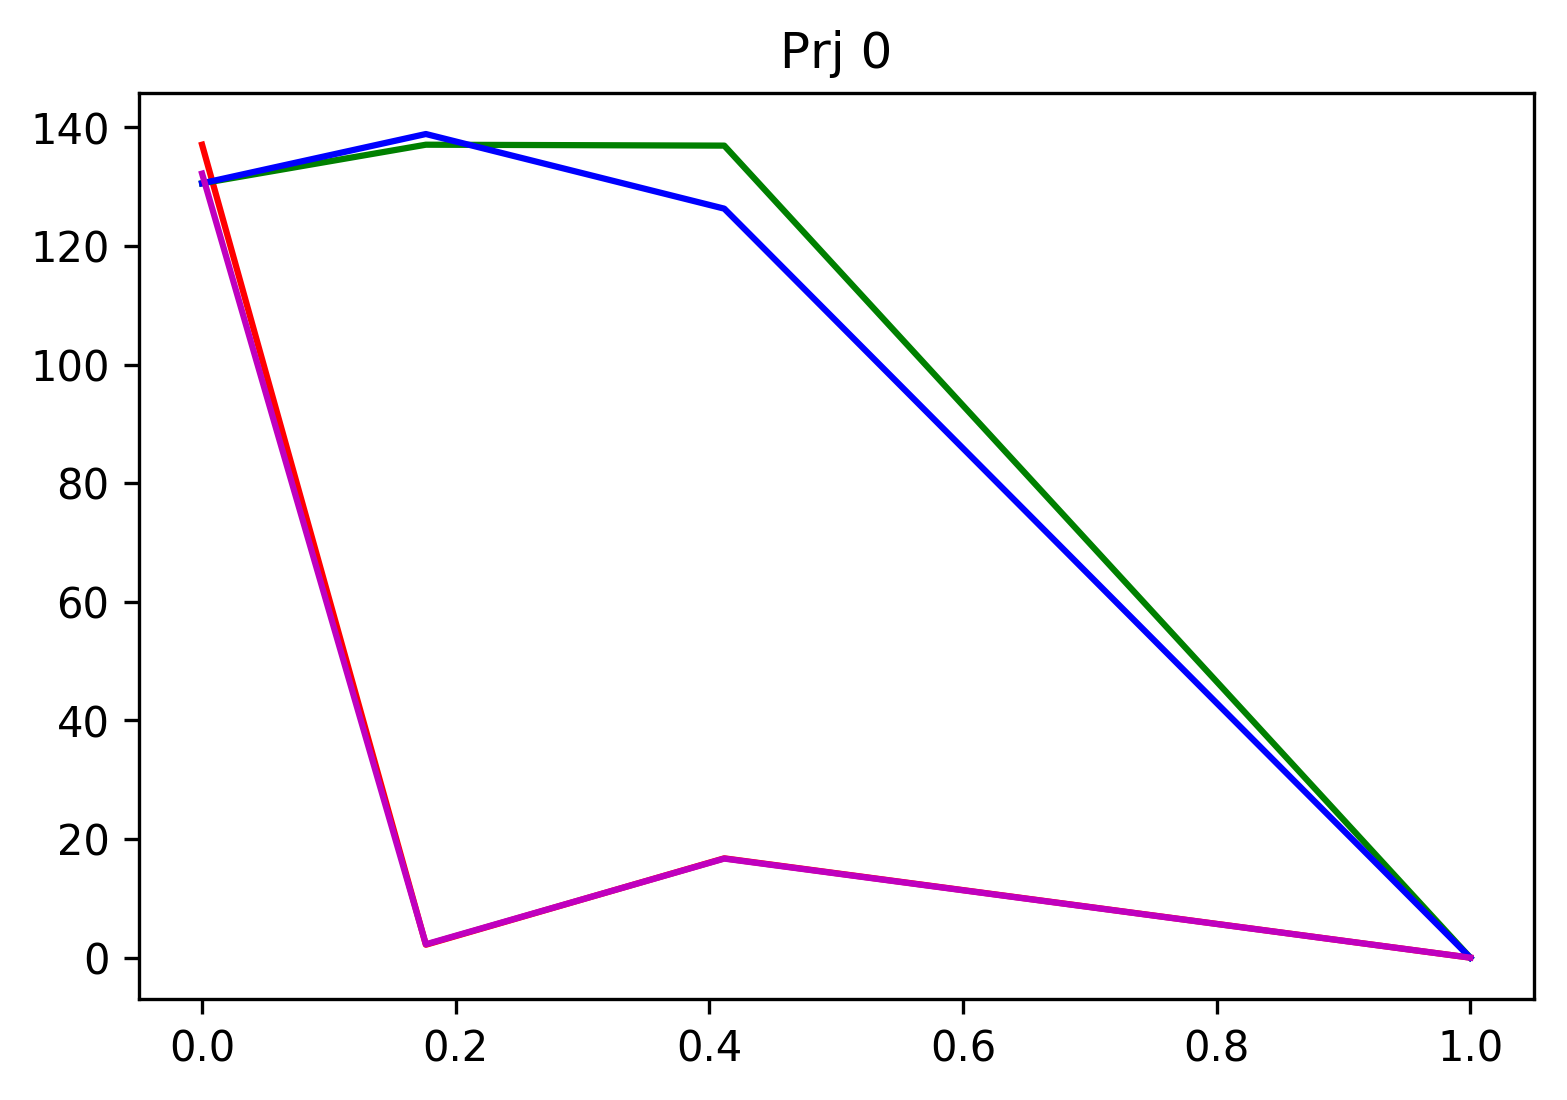

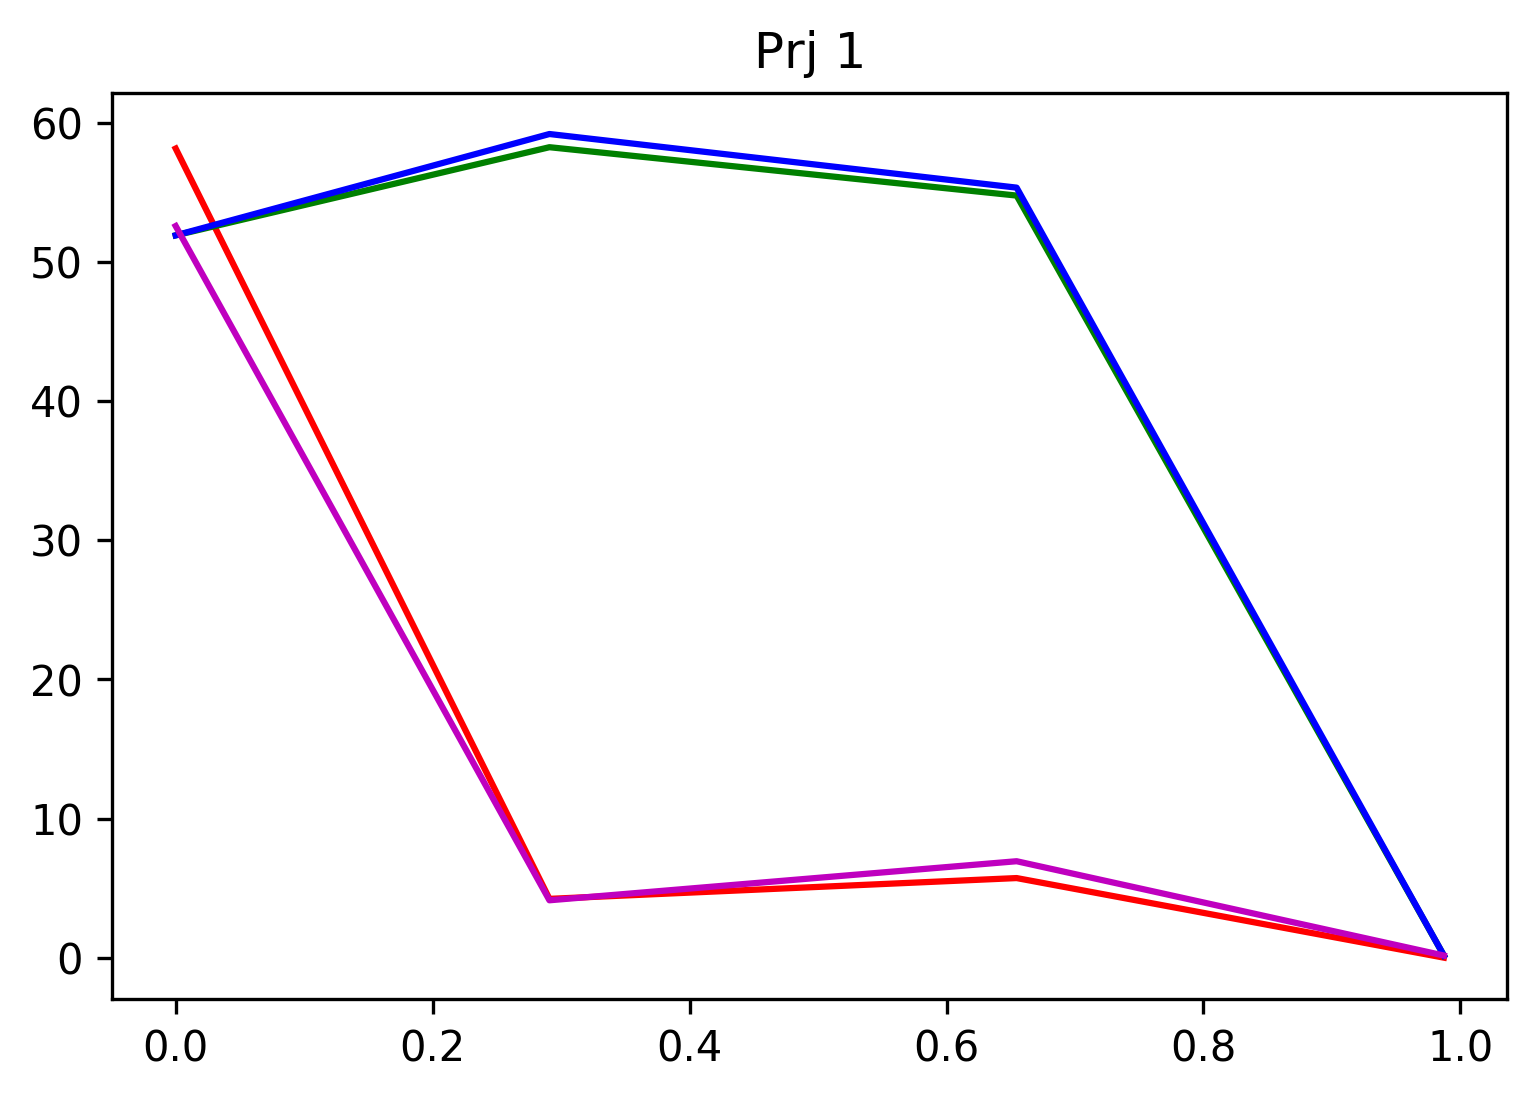

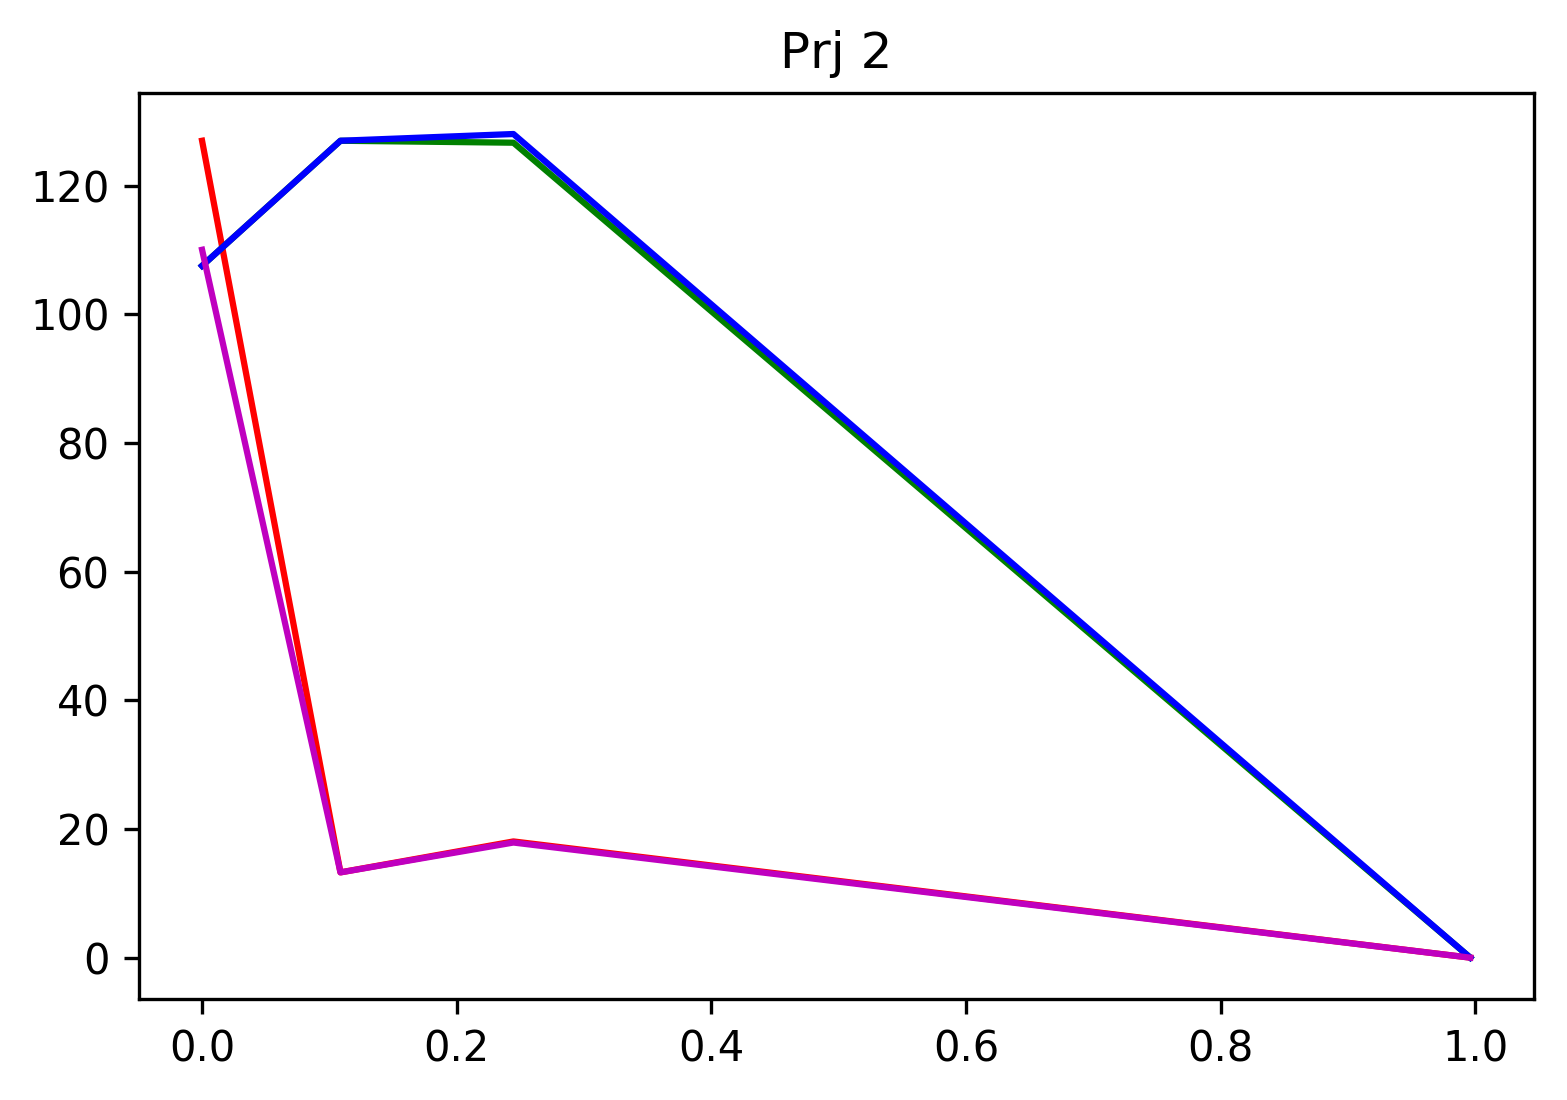

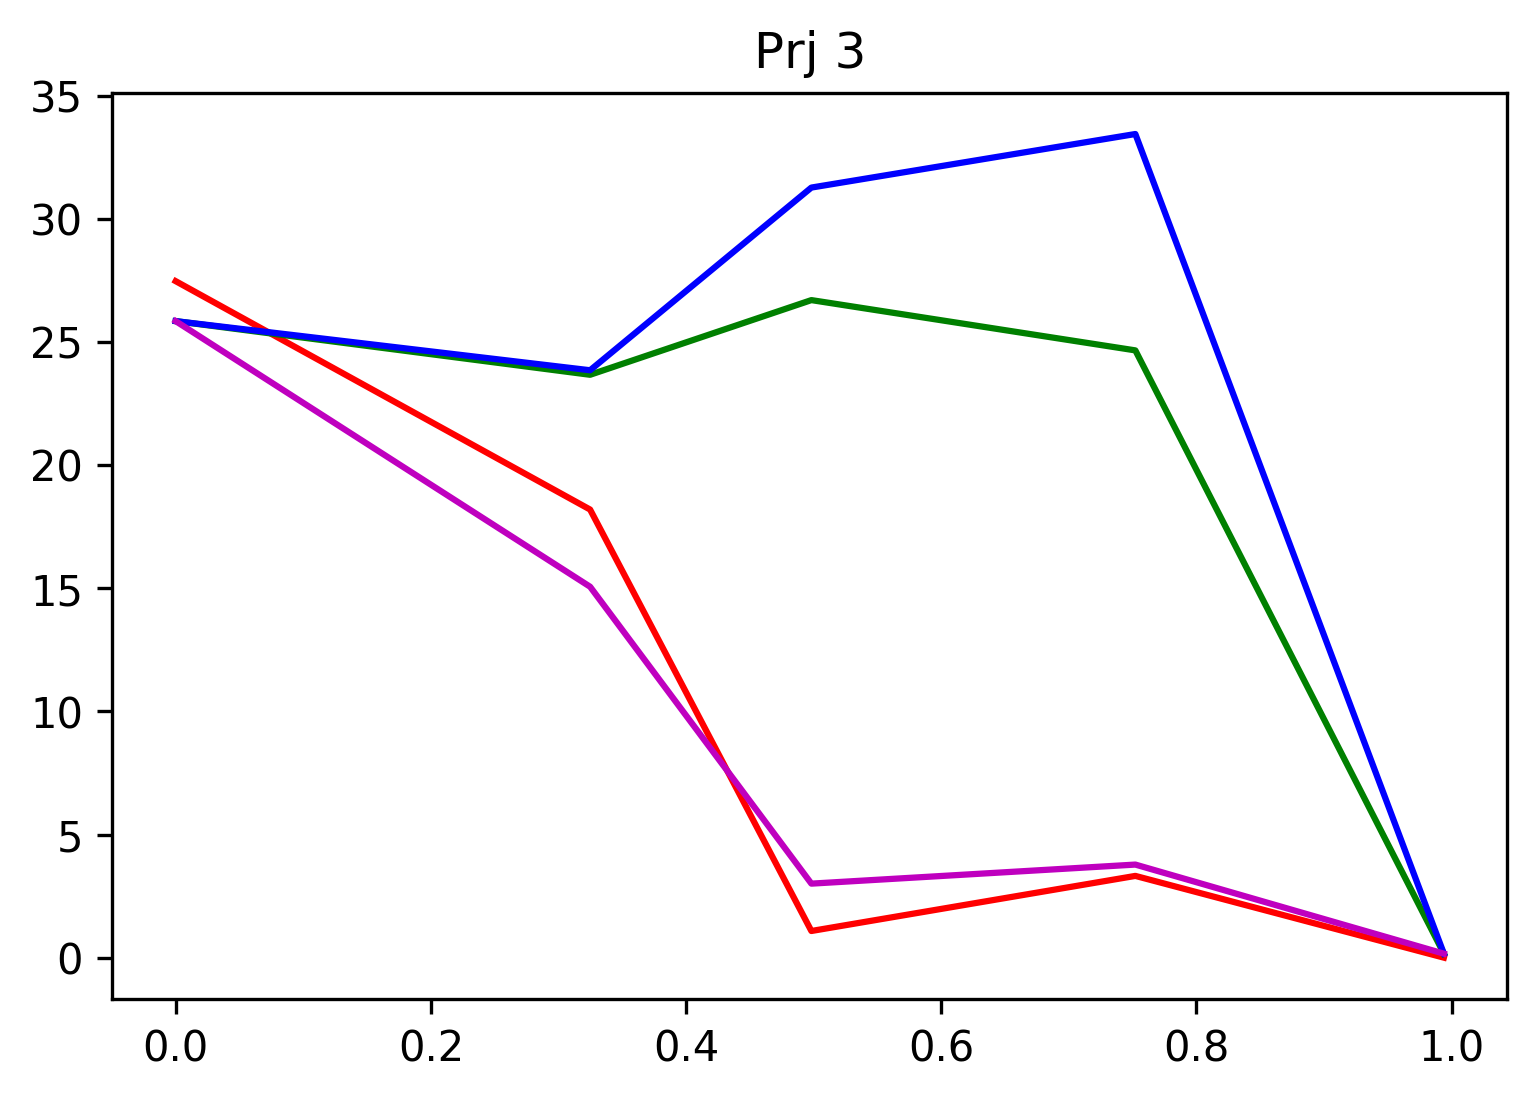

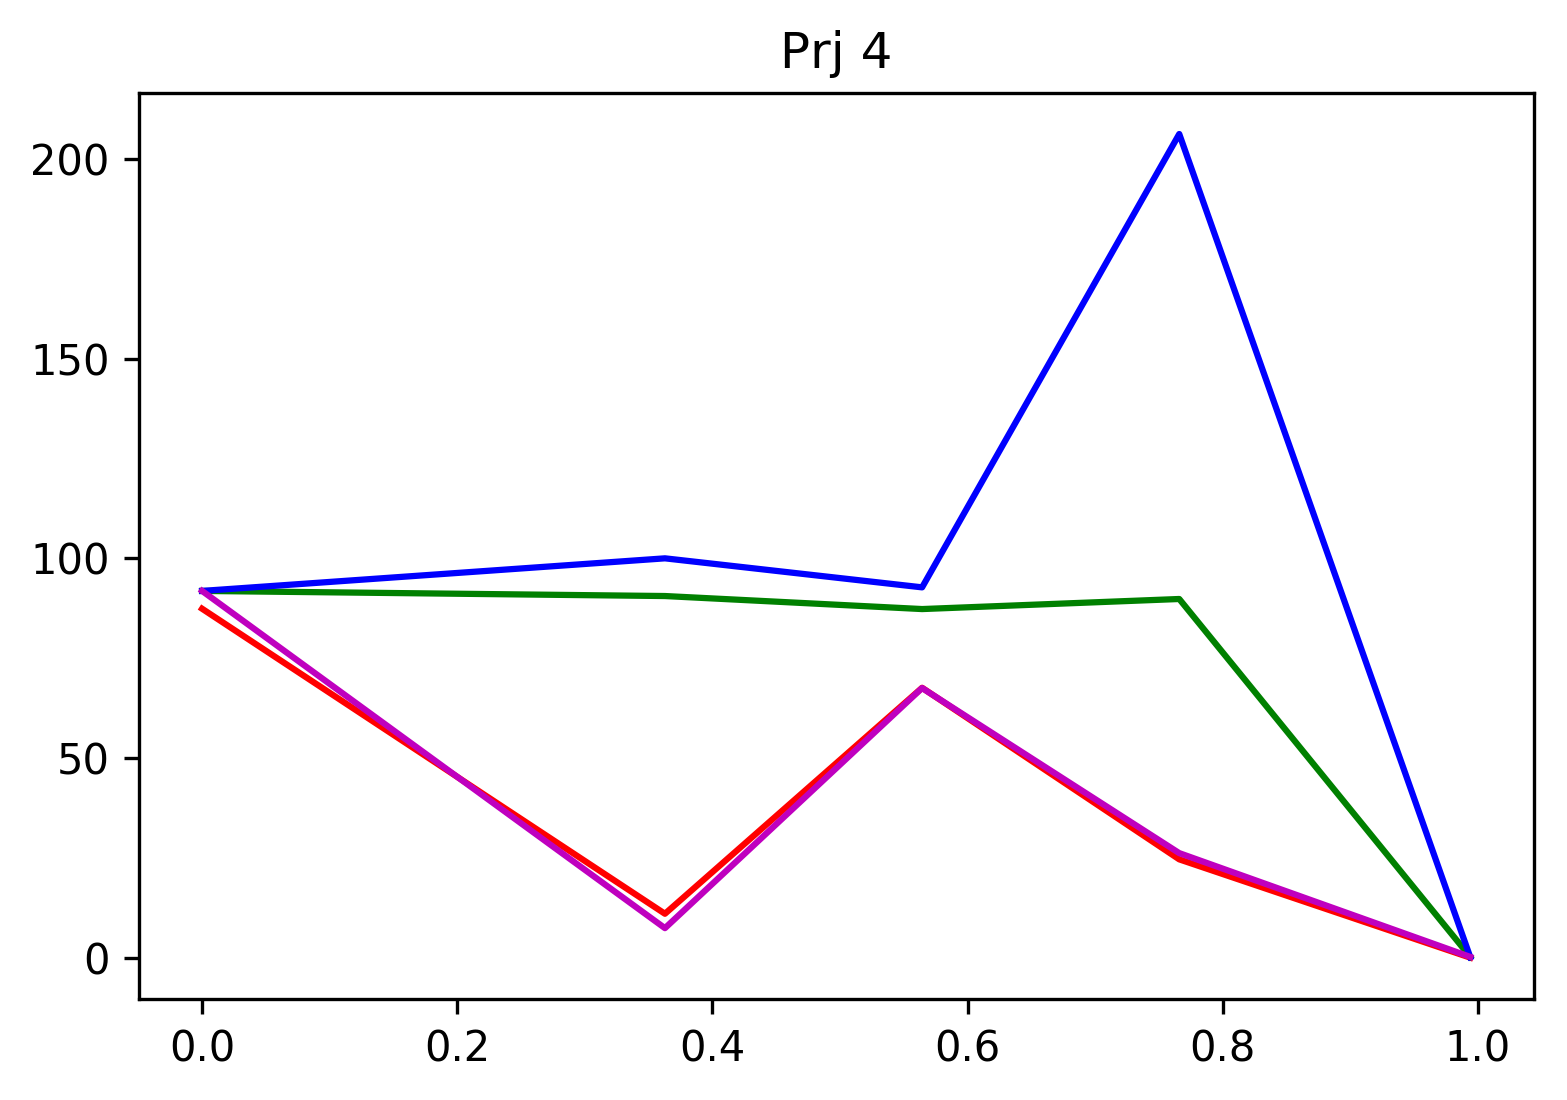

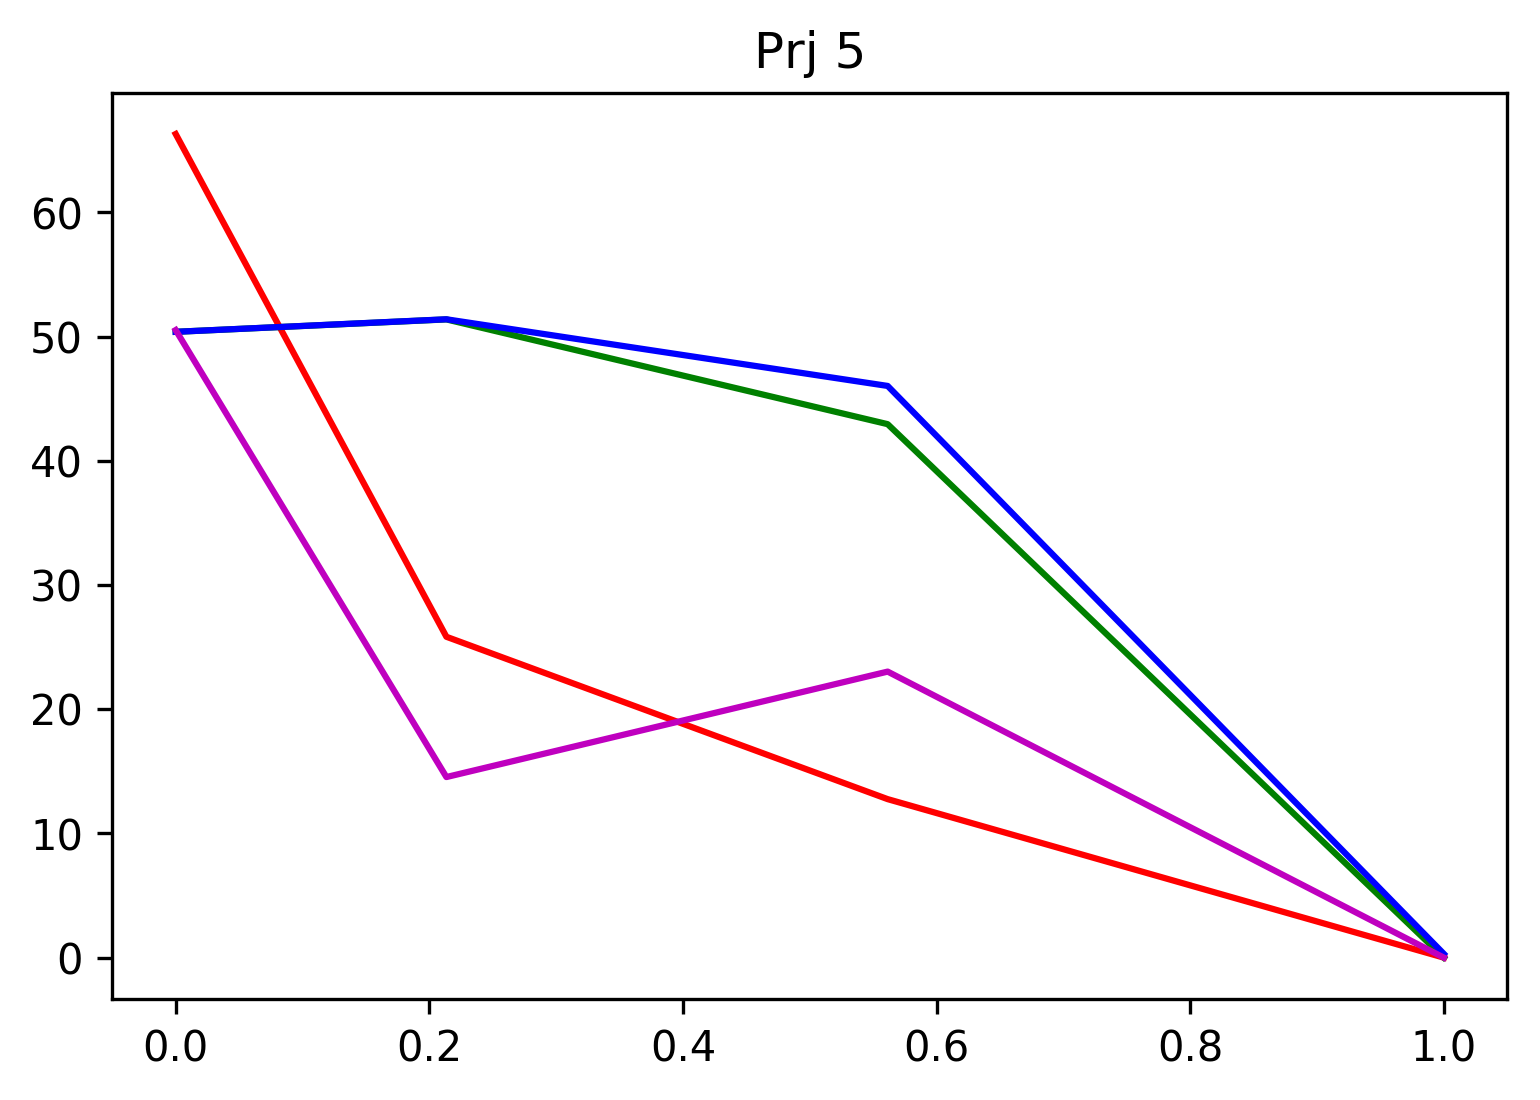

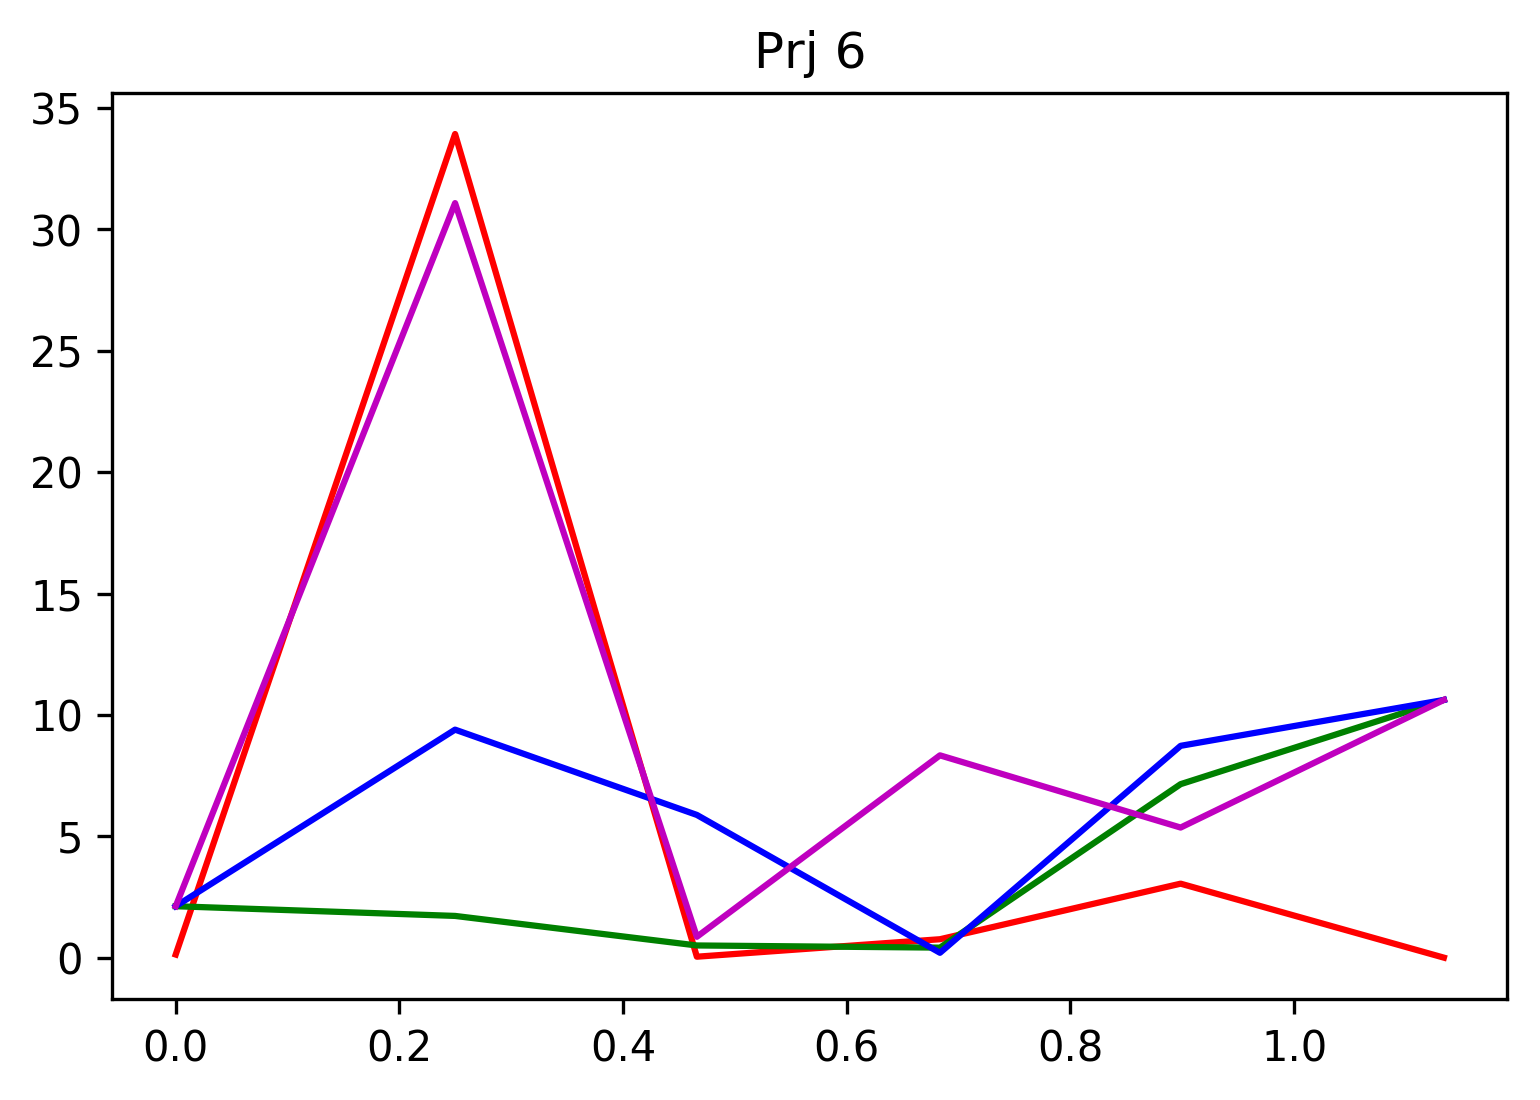

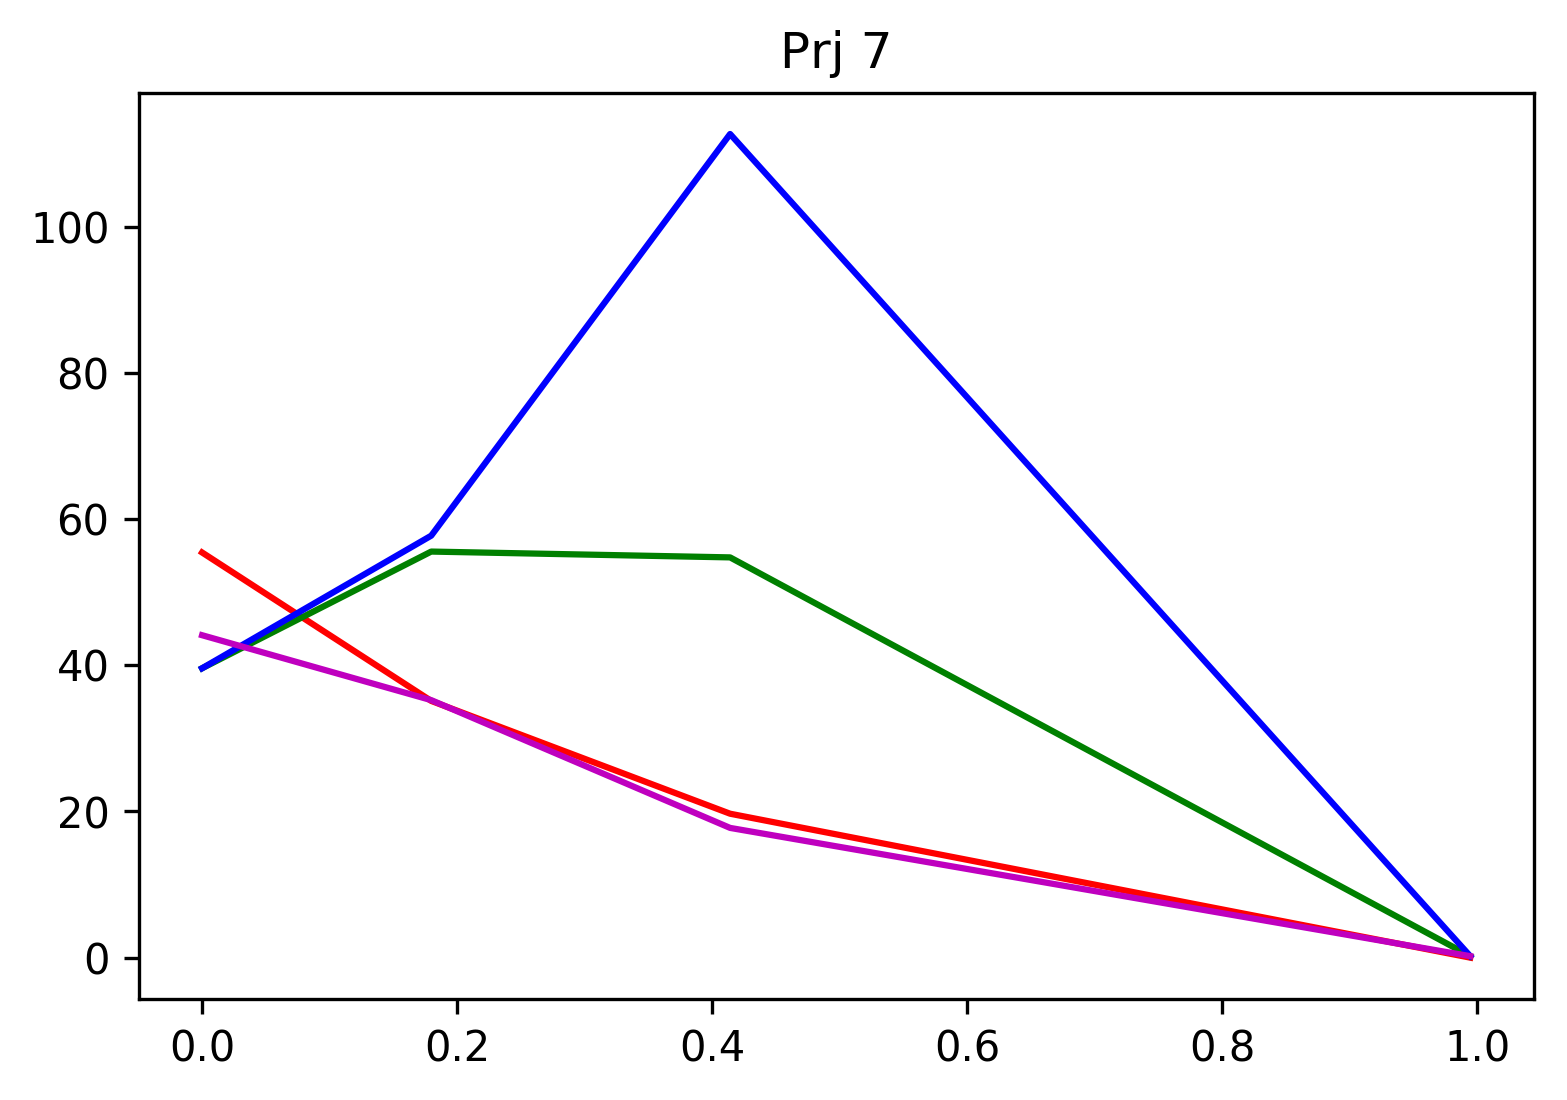

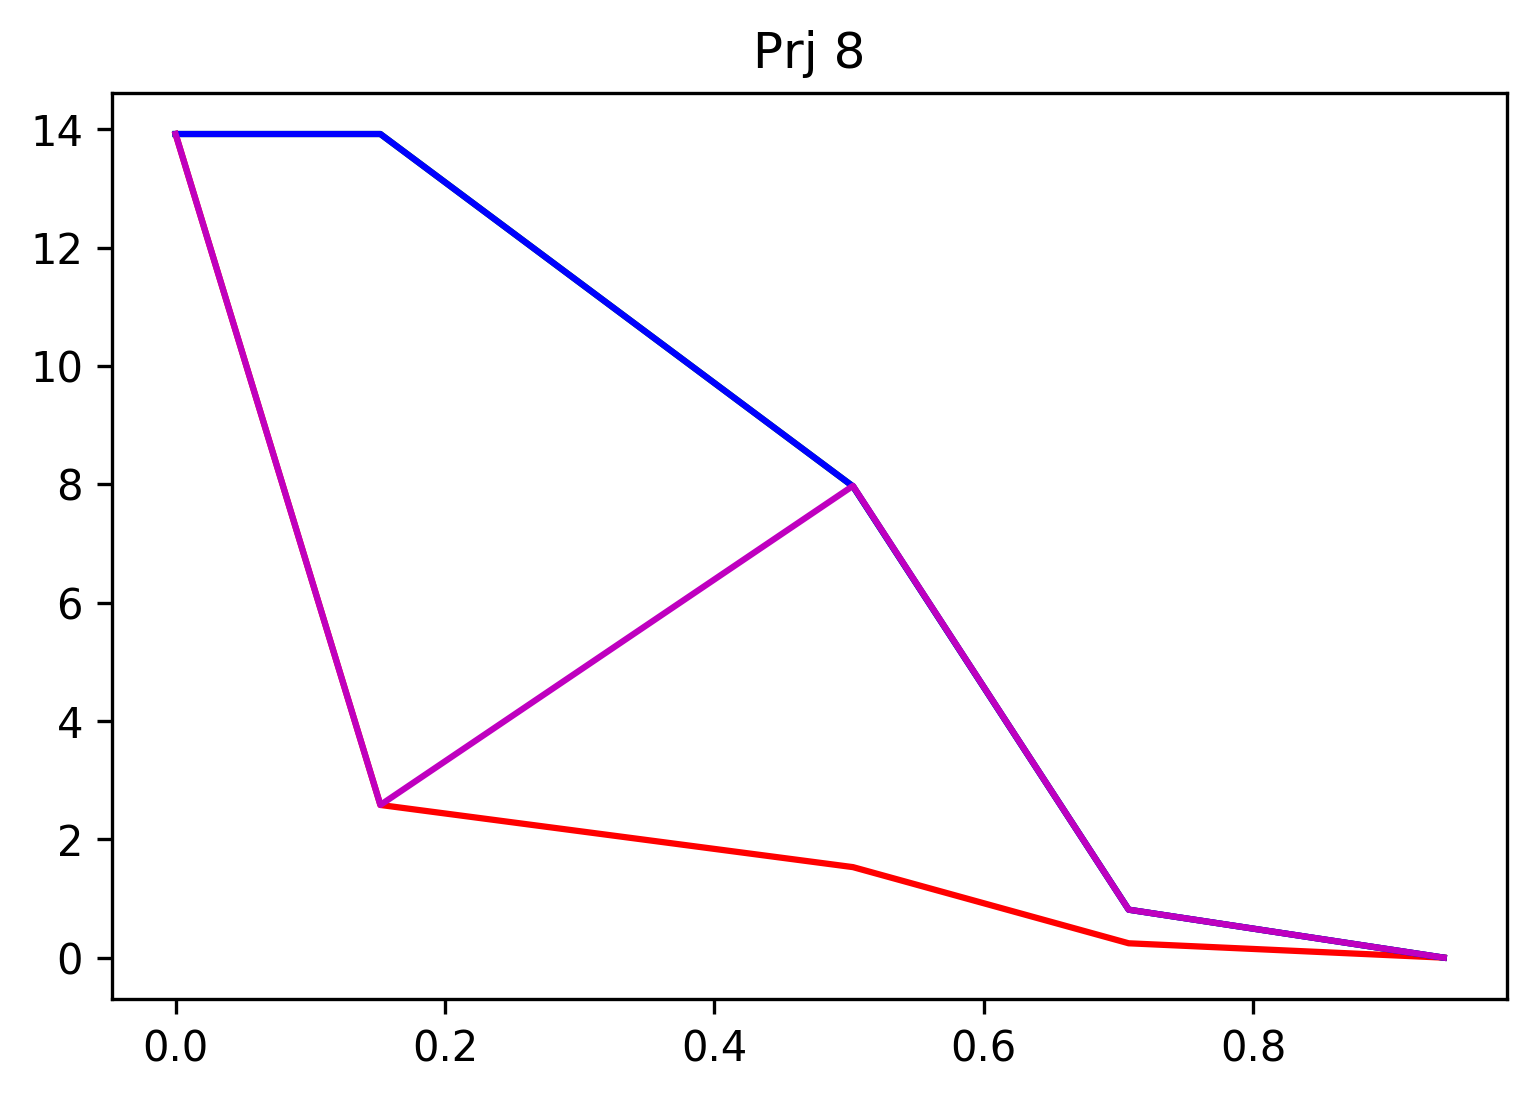

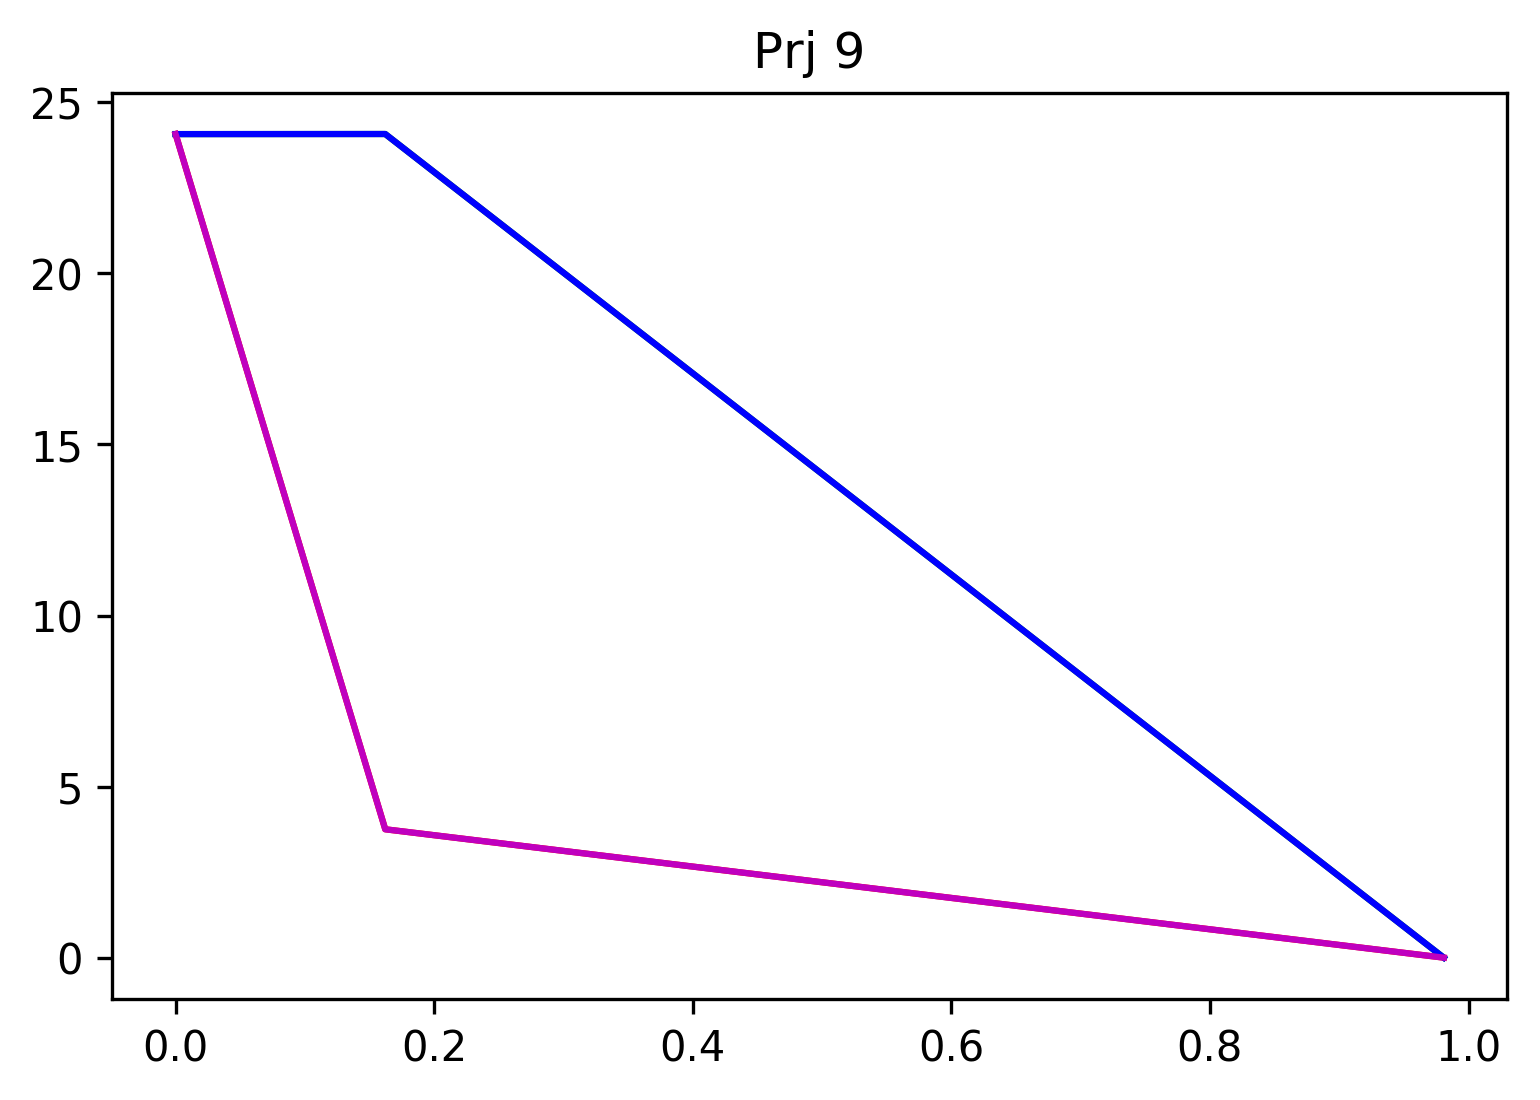

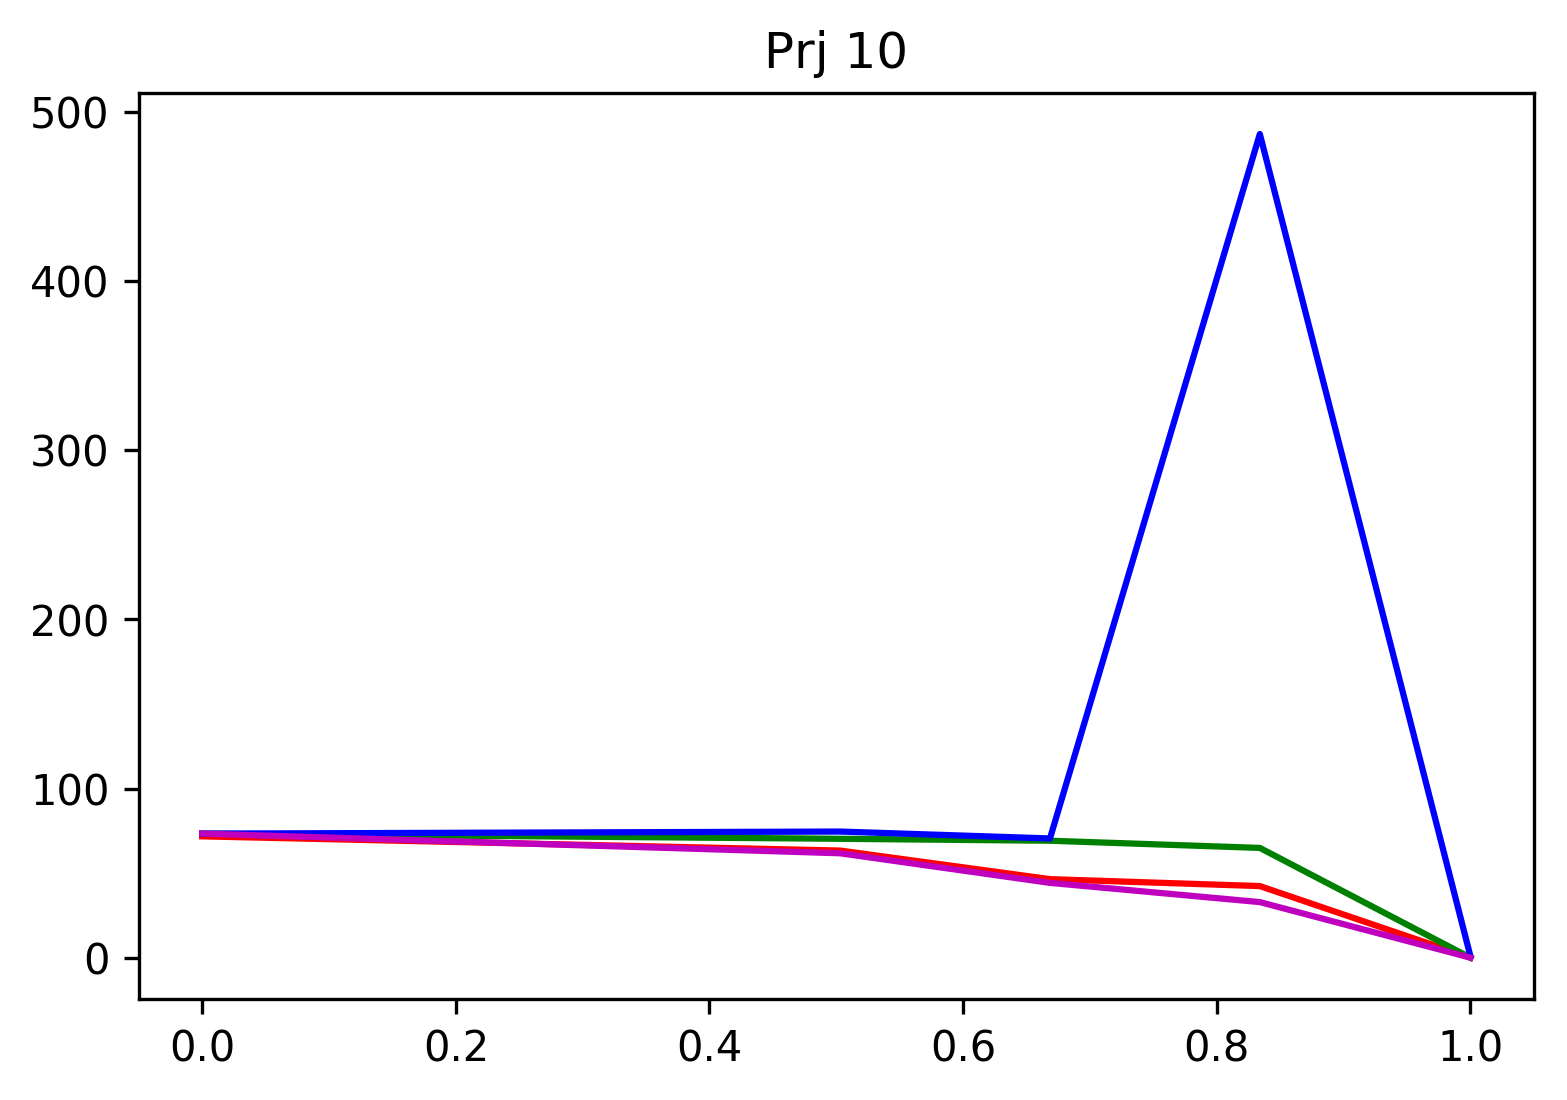

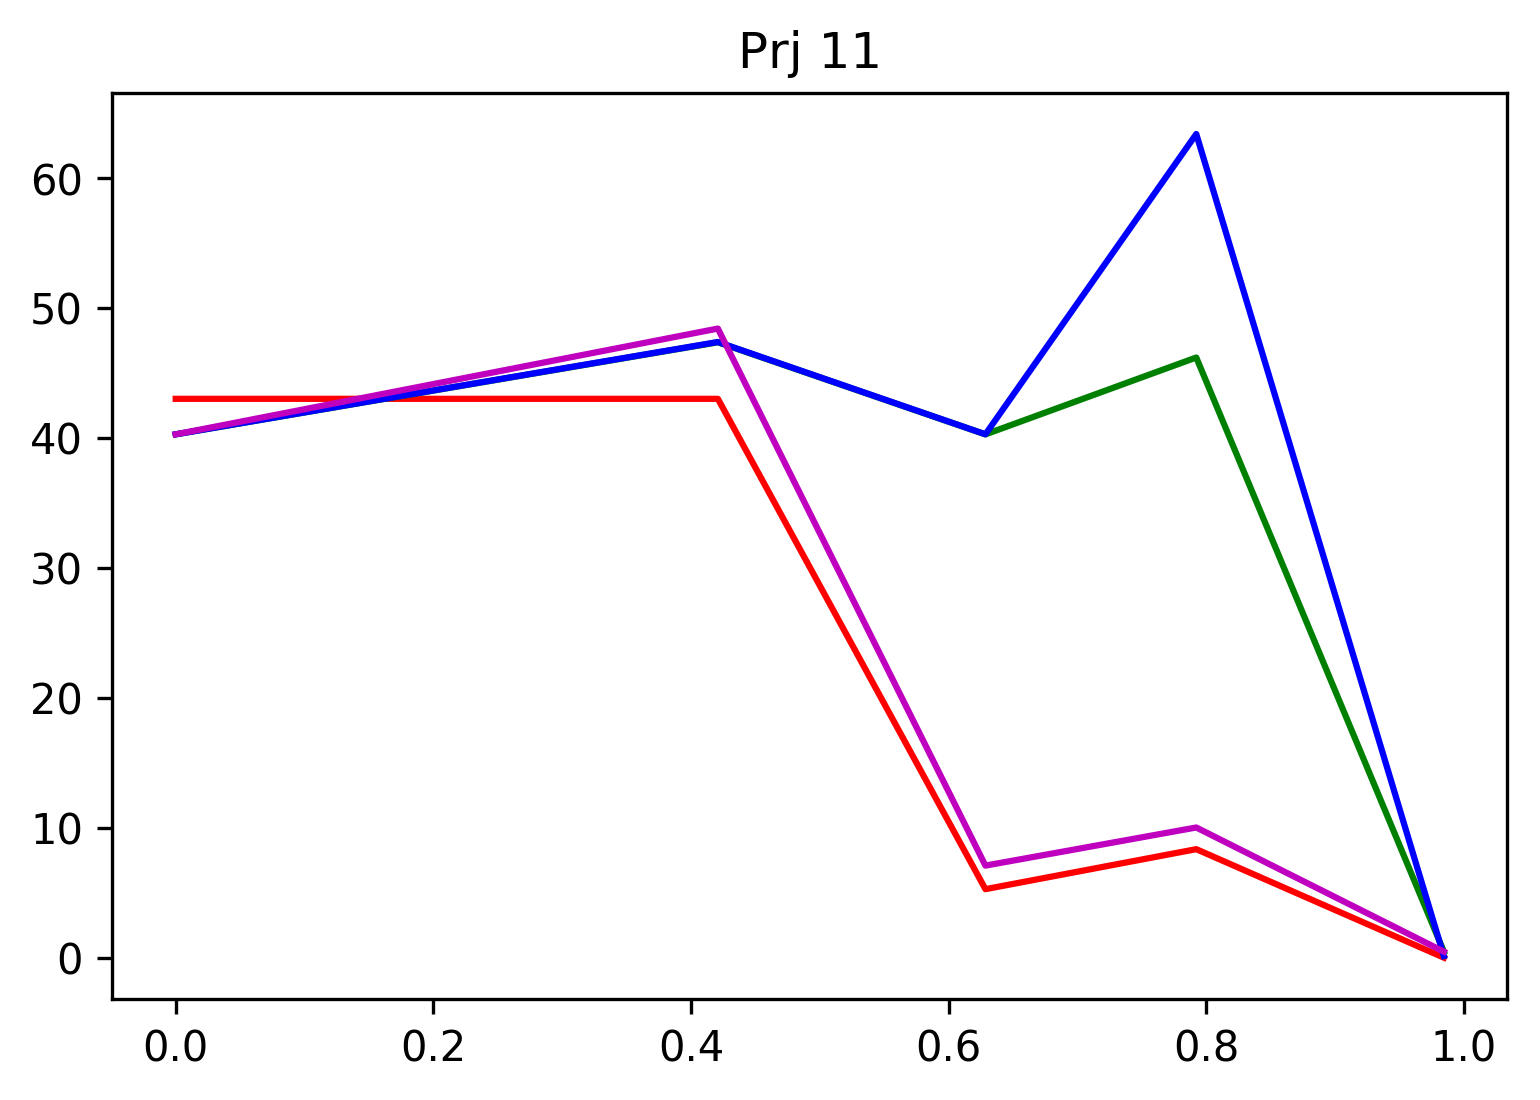

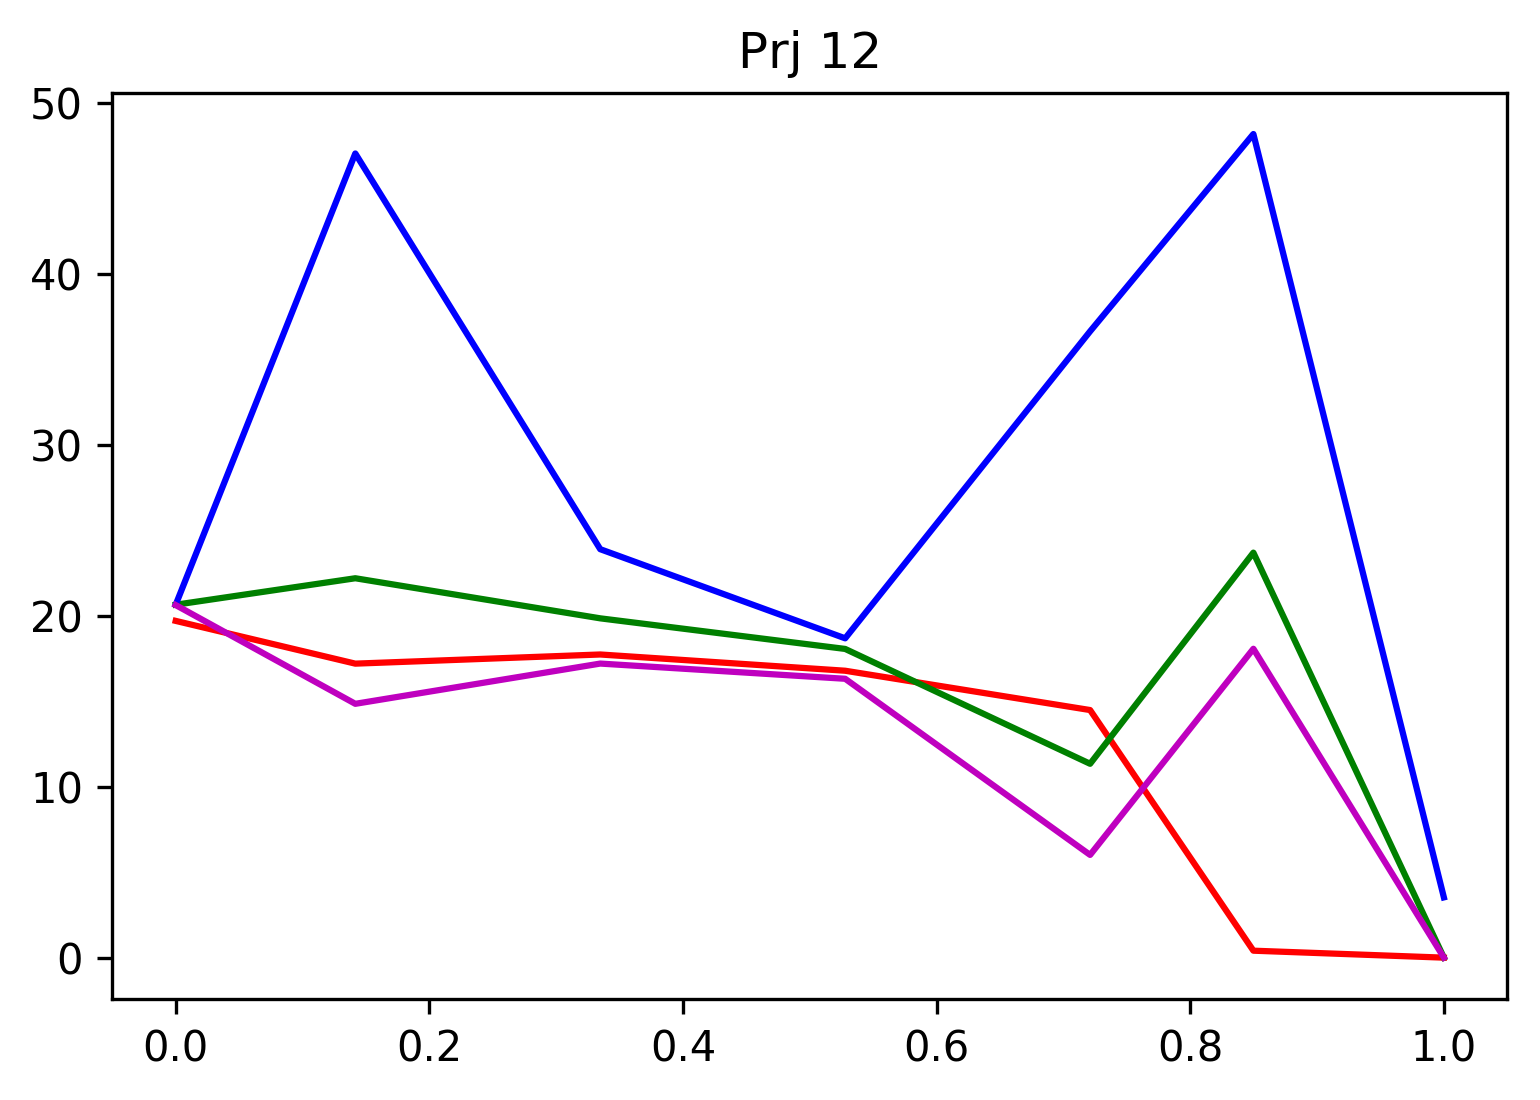

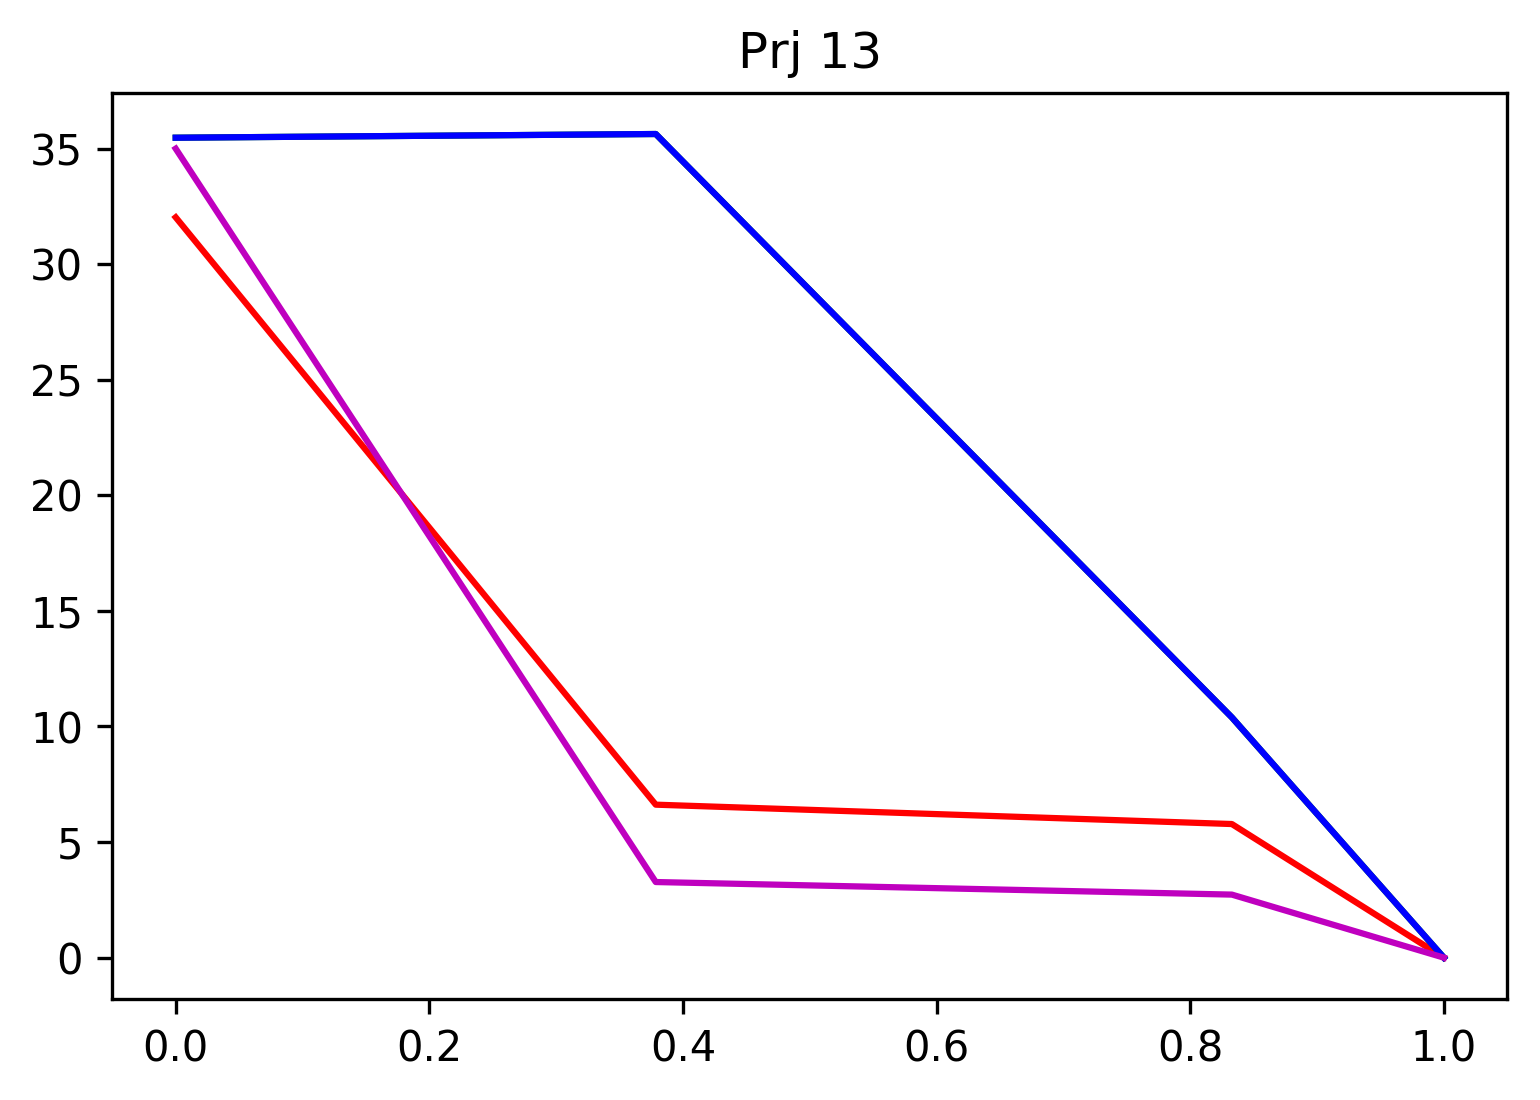

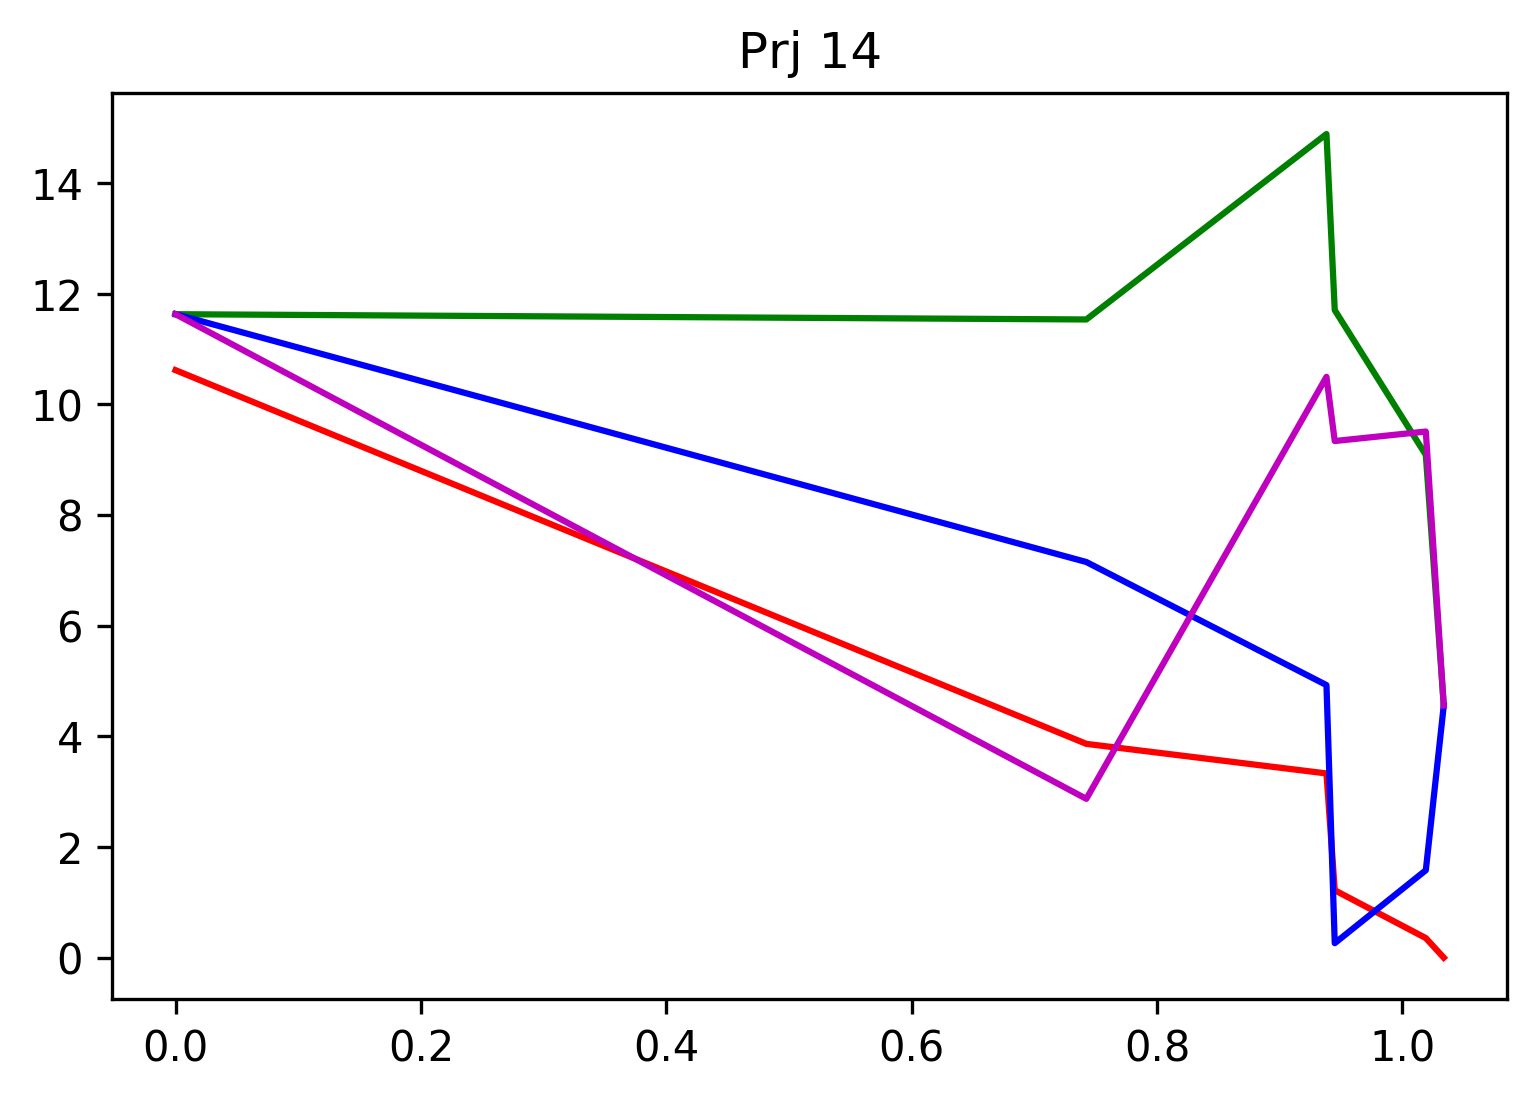

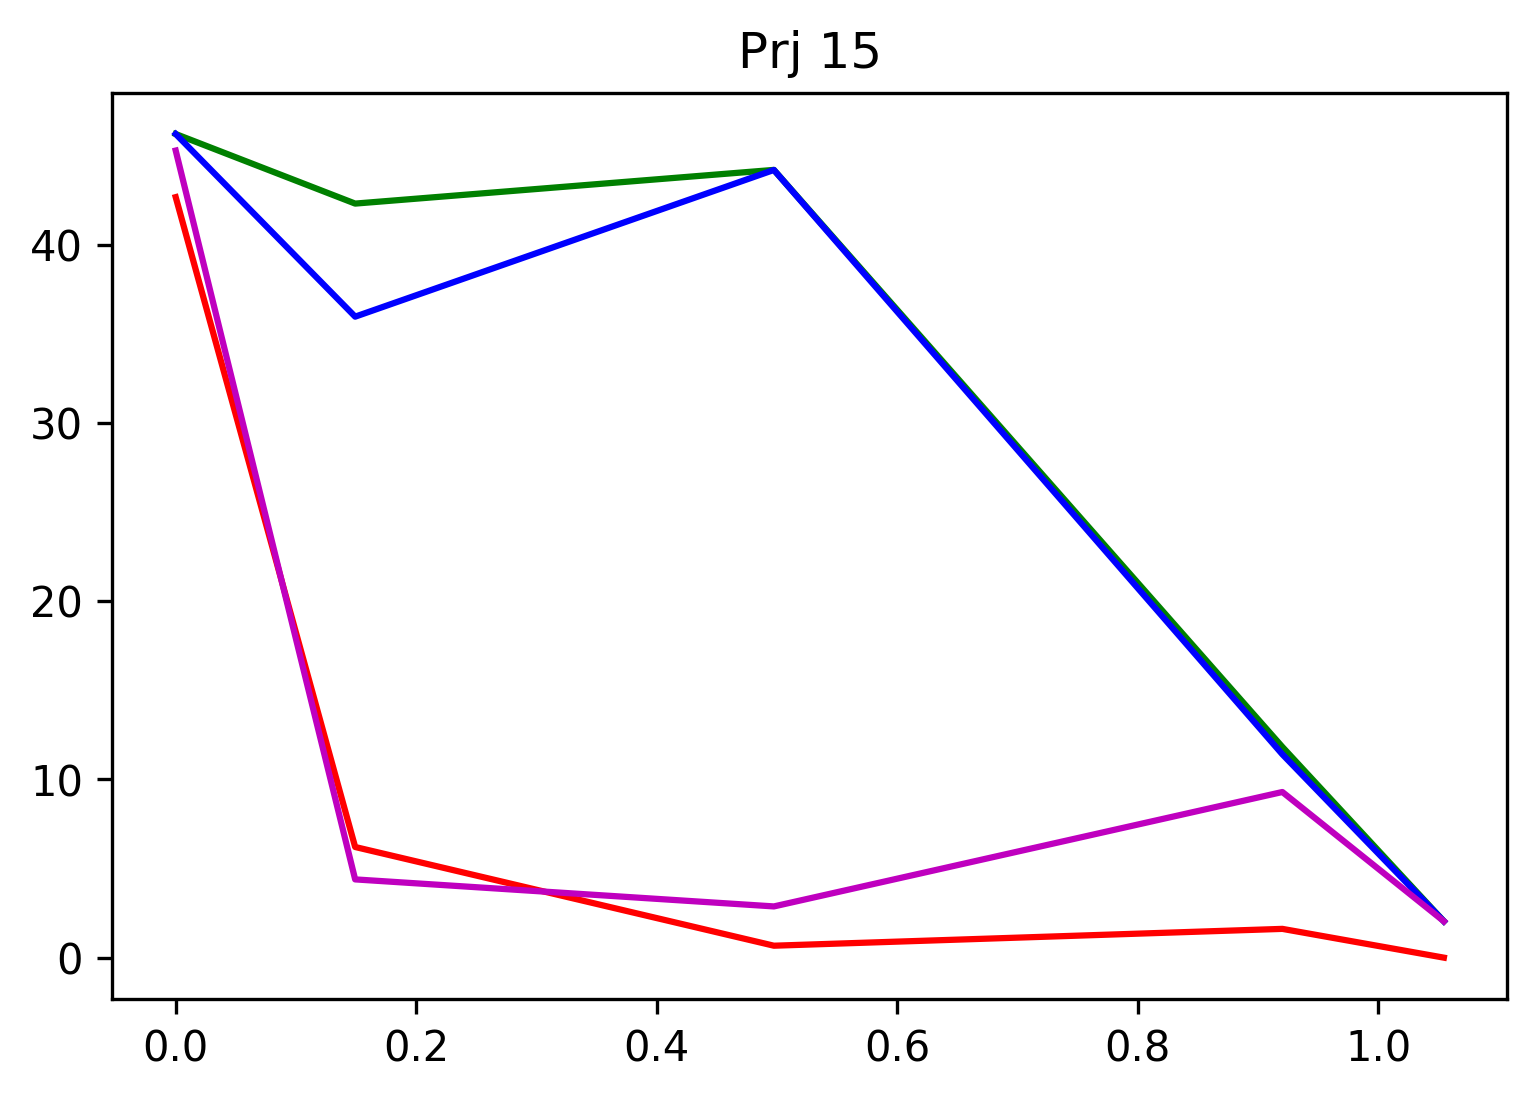

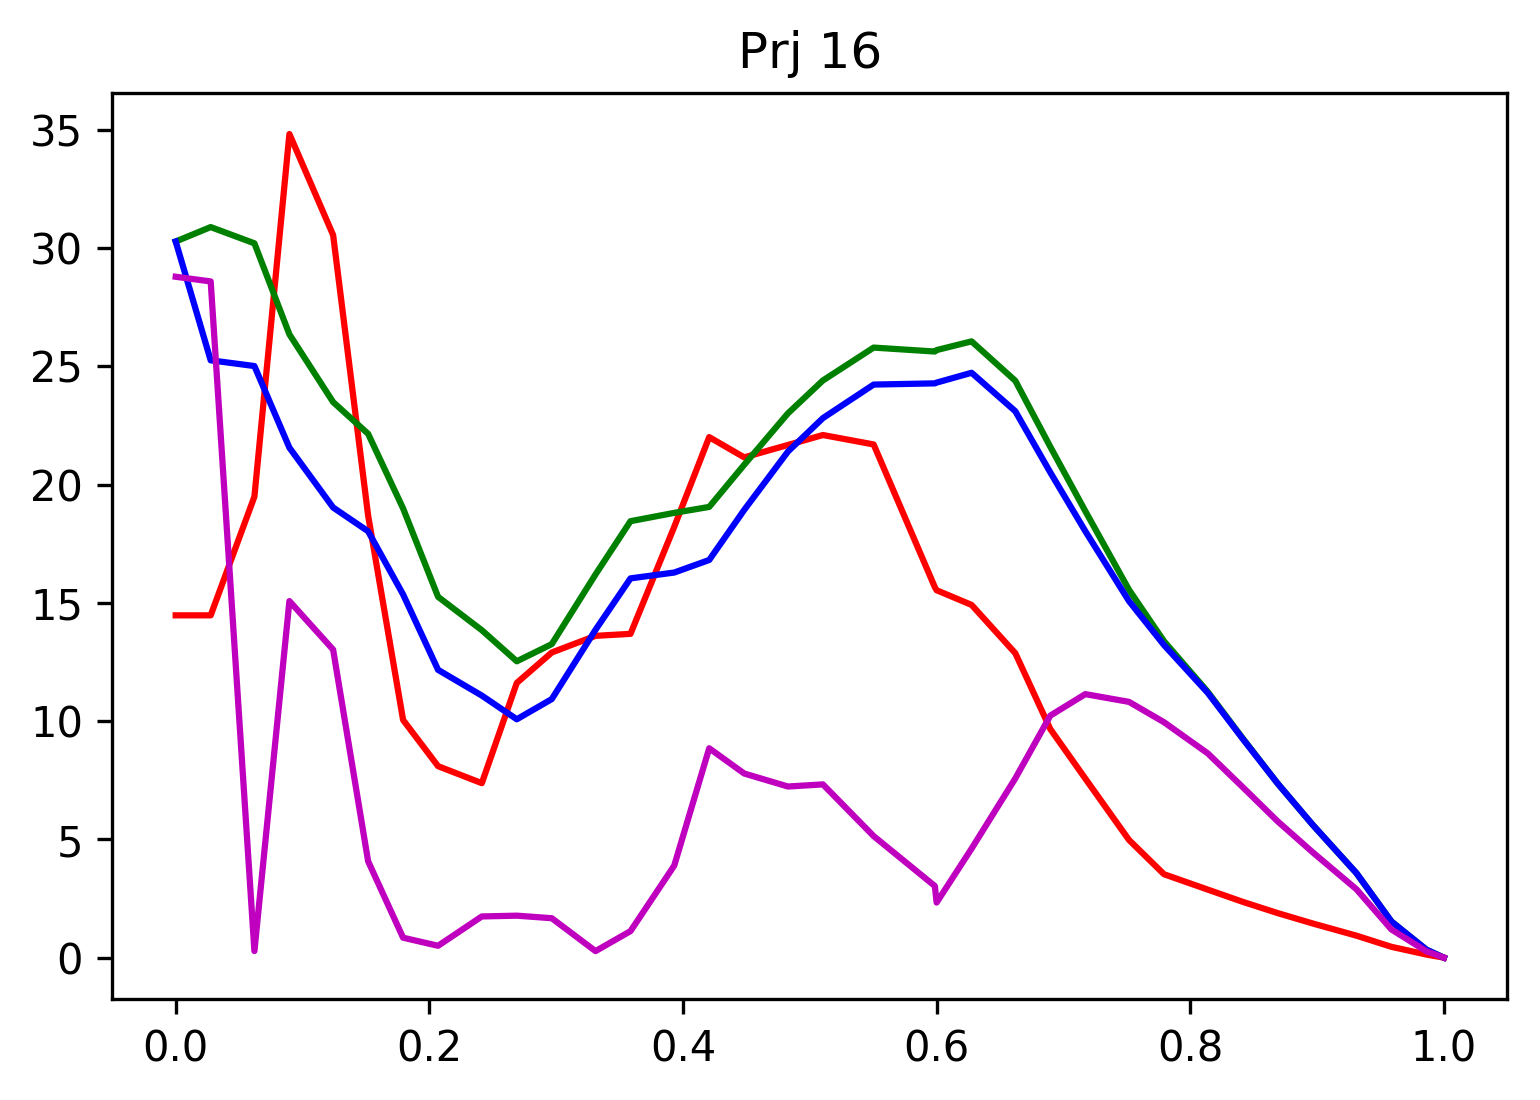

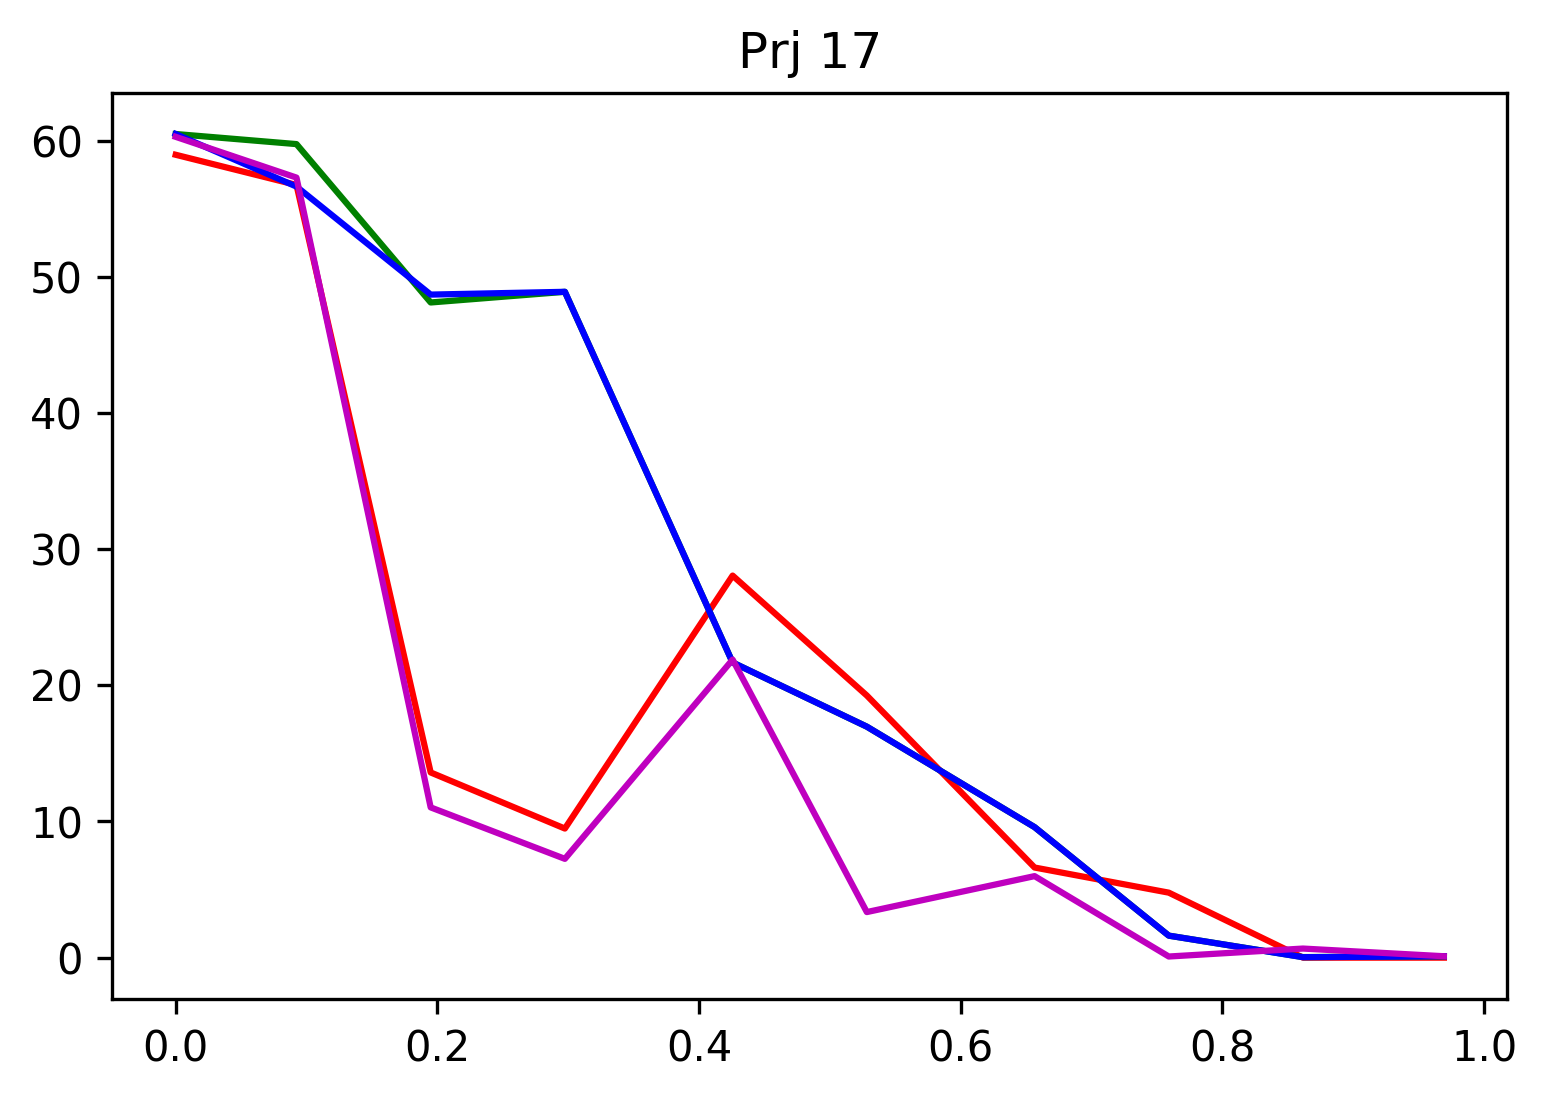

In [80]:
for i in range(0, np.size(files)):
    plt.title('Prj %d'%i)
    plt.plot(ATNs[i], np.abs(PE_EVM2[i]), 'r-', ATNs[i], np.abs(PE_GGM1[i]), 'g-', ATNs[i], np.abs(PE_GGM2[i]), 'b-', ATNs[i], np.abs(PE_GGM3[i]), 'm-')
    plt.show()


In [85]:
minTrack = np.min(n_tracking_periods)+1
maxTrack = np.max(n_tracking_periods)+1

def near(x):
    t = np.ceil(x) if np.ceil(x) - x < x - np.floor(x) else np.floor(x)
    t = int(t)
    return t
    
    
PE_EVM1_re = []
PE_EVM2_re = []
PE_EVM3_re = []
PE_GGM1_re = []
PE_GGM2_re = []
PE_GGM3_re = []
for i in range (0, np.size(files)):
    PE_EVM1_x = []
    PE_EVM2_x= []
    PE_EVM3_x= []
    PE_GGM1_x= []
    PE_GGM2_x= []
    PE_GGM3_x= []
    for j in np.array([0, near((n_tracking_periods[i])/4), near((n_tracking_periods[i])/2), near((n_tracking_periods[i] )*3/4),int(n_tracking_periods[i])]):
        PE_EVM1_x.append(PE_EVM1[i][j])
        PE_EVM2_x.append(PE_EVM2[i][j])
        PE_EVM3_x.append(PE_EVM3[i][j])
        PE_GGM1_x.append(PE_GGM1[i][j])
        PE_GGM2_x.append(PE_GGM2[i][j])
        PE_GGM3_x.append(PE_GGM3[i][j])
    
    PE_EVM1_re.append(PE_EVM1_x)
    PE_EVM2_re.append(PE_EVM2_x)
    PE_EVM3_re.append(PE_EVM3_x)
    PE_GGM1_re.append(PE_GGM1_x)
    PE_GGM2_re.append(PE_GGM2_x)
    PE_GGM3_re.append(PE_GGM3_x)


#     PE_EVM1_re.append(PE_EVM1[i] + [PE_EVM1[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))
#     PE_EVM2_re.append(PE_EVM2[i] + [PE_EVM2[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))
#     PE_EVM3_re.append(PE_EVM3[i] + [PE_EVM3[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))
#     PE_GGM1_re.append(PE_GGM1[i] + [PE_GGM1[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))
#     PE_GGM2_re.append(PE_GGM2[i] + [PE_GGM2[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))
#     PE_GGM3_re.append(PE_GGM3[i] + [PE_GGM3[i][-1]]*(maxTrack -1 - n_tracking_periods[i]))

MAPE_EVM1 = np.sum(np.abs(np.array(PE_EVM1_re)), axis = 0) / np.size(files) 
MAPE_EVM2 = np.sum(np.abs(np.array(PE_EVM2_re)), axis = 0) / np.size(files) 
MAPE_EVM3 = np.sum(np.abs(np.array(PE_EVM3_re)), axis = 0) / np.size(files) 
MAPE_GGM1 = np.sum(np.abs(np.array(PE_GGM1_re)), axis = 0) / np.size(files) 
MAPE_GGM2 = np.sum(np.abs(np.array(PE_GGM2_re)), axis = 0) / np.size(files) 
MAPE_GGM3 = np.sum(np.abs(np.array(PE_GGM3_re)), axis = 0) / np.size(files) 

print("EVM1 : " , MAPE_EVM1)
print("EVM2 : " , MAPE_EVM2)
print("EVM3 : " , MAPE_EVM3)
print("GGM1 : " , MAPE_GGM1)
print("GGM2 : " , MAPE_GGM2)
print("GGM3 : " , MAPE_GGM3)

# T = 4
# index = np.argwhere(np.array(n_tracking_periods) >= T).reshape((-1))
    
# MAPE_EVM2.append(np.sum(np.abs(PE_EVM2[i][T]) for i in index) / np.size(index))
# MAPE_GGM3.append(np.sum(np.abs(PE_GGM3[i][T]) for i in index) / np.size(index))
# print("GGM3 : " , MAPE_GGM3)
# print("EVM2 : " , MAPE_EVM2)

EVM1 :  [4.94495489e+01 4.07230037e+01 3.38091058e+01 1.59085541e+01
 1.36797363e-15]
EVM2 :  [49.44954895 18.42260528 15.76833699 10.58990837  0.        ]
EVM3 :  [ 49.44954895 157.57888419  58.93057425  15.07463708   0.        ]
GGM1 :  [47.56186816 48.58043807 46.89089945 40.74905412  1.02754149]
GGM2 :  [47.56186816 50.71681119 47.48723033 76.04473587  1.27023397]
GGM3 :  [47.91414478 16.54978786 14.77579821 11.30497457  1.02754147]


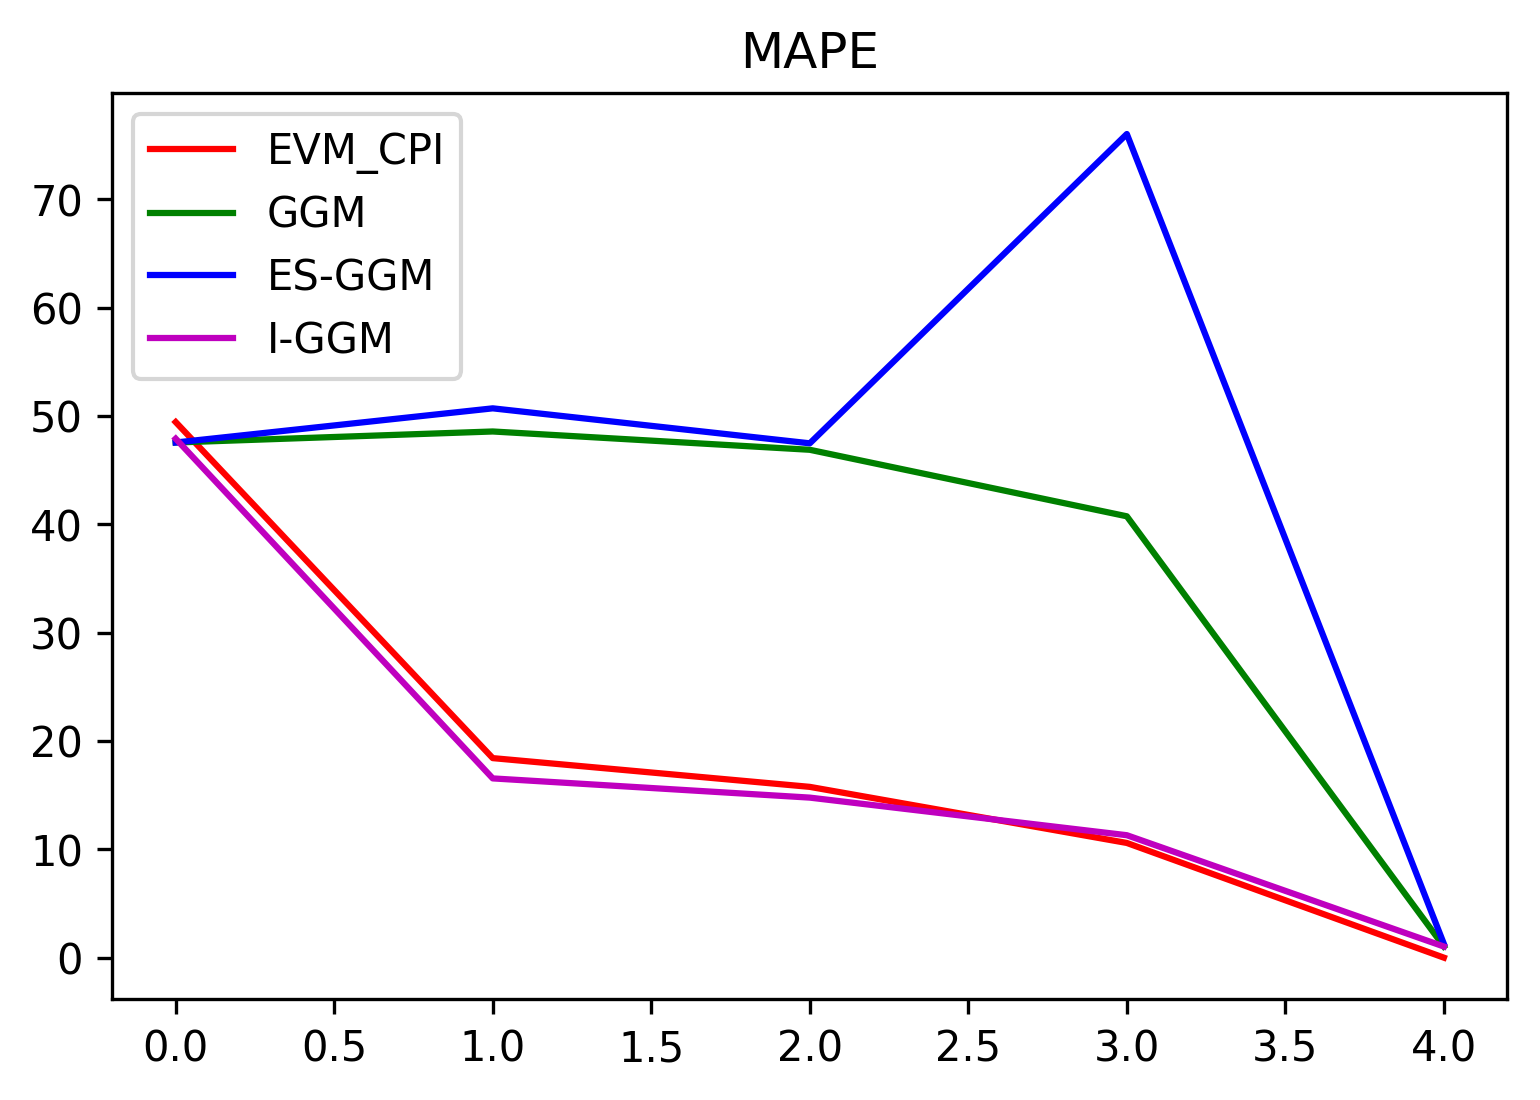

In [88]:
plt.rcParams['figure.dpi'] = 300

plt.title('MAPE')
plt.plot(MAPE_EVM2[:], 'r-', MAPE_GGM1[:], 'g-',  MAPE_GGM2[:], 'b-',  MAPE_GGM3[:], 'm-')
plt.legend(['EVM_CPI', 'GGM', 'ES-GGM', 'I-GGM'])
plt.show()

In [252]:
# Ve bang
'''
fig = go.Figure(
    layout = dict(height=1000),
    data=[go.Table(
        columnwidth = [200,400],
        header=dict(values=['Project', 'EVM based', 'GGM based', 'ES GGM based', 'CPI', 'CR', 'CI'],
                line_color='black',
                fill_color='white',
                align='center'),
        cells=dict(values=[list(range(0, np.size(files))),
                           [float(int(pe*10000))/10000 for pe in PE1],
                           [float(int(pe*10000))/10000 for pe in PE2],
                           [float(int(pe*10000))/10000 for pe in PE3],
                           [float(int(cp*10000))/10000 for cp in CPI],
                           [float(int(cr*10000))/10000 for cr in CR],
                           [float(int(ci*10000))/10000 for ci in CI]],
                line_color='black',
                fill_color='white',
                align=['center', 'right']))
    ]
)

fig.show()
'''


"\nfig = go.Figure(\n    layout = dict(height=1000),\n    data=[go.Table(\n        columnwidth = [200,400],\n        header=dict(values=['Project', 'EVM based', 'GGM based', 'ES GGM based', 'CPI', 'CR', 'CI'],\n                line_color='black',\n                fill_color='white',\n                align='center'),\n        cells=dict(values=[list(range(0, np.size(files))),\n                           [float(int(pe*10000))/10000 for pe in PE1],\n                           [float(int(pe*10000))/10000 for pe in PE2],\n                           [float(int(pe*10000))/10000 for pe in PE3],\n                           [float(int(cp*10000))/10000 for cp in CPI],\n                           [float(int(cr*10000))/10000 for cr in CR],\n                           [float(int(ci*10000))/10000 for ci in CI]],\n                line_color='black',\n                fill_color='white',\n                align=['center', 'right']))\n    ]\n)\n\nfig.show()\n"

# Time forecasting

In [75]:
# standard least_square
x0 = [np.ones(3) for i in range(0, np.size(files))]
res_lsq = [least_squares(gompertz_r, x0[i], args=(ATNs[i], PVNs[i])) for i in range(0, np.size(files))]

# robust least squares
#x1 = np.ones(3)
#res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

## Tham so dau vao [narbaev2014]
alphap = [lsq.x[0] for lsq in res_lsq]
betap  = [lsq.x[1] for lsq in res_lsq]
gammap = [lsq.x[2] for lsq in res_lsq]

print ('alphap=', alphap)
print ('betap=', betap)
print ('gammap=', gammap)



alphap= [1.0506055505105427, 1.2994142005590257, 1.0306058990234828, 0.9693987726643594, 0.969402732893515, 0.9959454416800985, 1.2148069889778772, 0.9066205966090448, 1.0920892157850808, 1.0963715583219018, 1.0095344640083088, 1.0, 1.000000000803051, 1.2052755866608462, 0.9810371399623978, 1.1054995890523365, 1.139975668374876, 1.0712247590682622, 1.0966303387468306, 0.9986980209097128, 1.107824616750371]
betap= [1.5230578177846743, 1.9360112040306319, 1.30628226797334, 1.5550213196855136, 1.0539483185227367, 2.7363453668059243, 2.9659497424469228, 1.7840712324718113, 7.0688103039144465, 2.788132828524943, 0.9080440401693955, 3.009625881591777, 2.3833675004486756, 2.6277684797671768, 13.683072363701966, 1.8087142117108048, 1.3062024432414074, 3.2390099695884786, 1.1918268379066044, 0.7764040067731546, 1.1470033860337012]
gammap= [4.092015614798169, 3.135828890823287, 4.750454964512725, 9.530019364537042, 12.12496478328268, 7.474310968808673, 4.731590153800995, 12.307920031109687, 9.97

In [77]:
# Regression
alphae = []
betae  = []
gammae = []

for i in range(0, np.size(files)):
    print ("Project: ", i)

    alphax = []
    betax  = []
    gammax = []
    for j in range(0, n_tracking_periods[i]+1):
        # Response
        RP = [EVNs[i][t] if t <= j else PVNs[i][t] for t in range(0, n_tracking_periods[i]+1)]

        # standard least_square
        x0 = np.ones(3)
        lsq = least_squares(gompertz_r, x0, args=(ATNs[i], RP))

        # robust least squares
        #x1 = np.ones(3)
        #res_robust = least_squares(gompertz_r, x1, loss='soft_l1', f_scale=0.1, args=(ATNs, RPs))

        ## Tham so dau vao [narbaev2014]
        alpha = lsq.x[0]
        beta  = lsq.x[1]
        gamma = lsq.x[2]

        alphax.append(alpha)
        betax.append(beta)
        gammax.append(gamma)

    alphae.append(alphax)
    betae.append(betax)
    gammae.append(gammax)


Project:  0
Project:  1
Project:  2
Project:  3
Project:  4
Project:  5
Project:  6
Project:  7
Project:  8
Project:  9
Project:  10
Project:  11
Project:  12
Project:  13
Project:  14
Project:  15
Project:  16
Project:  17
Project:  18
Project:  19
Project:  20


In [54]:
'''
g_p   = [[gompertz(t, alphap[i], betap[i], gammap[i]) for t in ATNs[i]] for i in range(0, np.size(files))]
g_e   = [[gompertz(t, alphae[i], betae[i], gammae[i]) for t in ATNs[i]] for i in range(0, np.size(files))]
g_a   = [[gompertz(t, alphaa[i], betaa[i], gammaa[i]) for t in ATNs[i]] for i in range(0, np.size(files))]

# In[2]
for i in range(0, np.size(files)):
    # plot gompertz
    plt.plot(t_x[i], g_p[i], 'b-', t_x[i], g_e[i], 'r-', t_x[i], g_a[i], 'g-')
    plt.title(f'Gompertz Project {i}')
    plt.xlabel('Weeks')
    plt.ylabel('Planned, Earned & Cost Rate')
    plt.autoscale(tight='both')
    plt.show()
'''


"\ng_p   = [[gompertz(t, alphap[i], betap[i], gammap[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\ng_e   = [[gompertz(t, alphae[i], betae[i], gammae[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\ng_a   = [[gompertz(t, alphaa[i], betaa[i], gammaa[i]) for t in ATNs[i]] for i in range(0, np.size(files))]\n\n# In[2]\nfor i in range(0, np.size(files)):\n    # plot gompertz\n    plt.plot(t_x[i], g_p[i], 'b-', t_x[i], g_e[i], 'r-', t_x[i], g_a[i], 'g-')\n    plt.title(f'Gompertz Project {i}')\n    plt.xlabel('Weeks')\n    plt.ylabel('Planned, Earned & Cost Rate')\n    plt.autoscale(tight='both')\n    plt.show()\n"

In [82]:
## Sinh du lieu
## p = planned, e = earned, a = actual
t_x   = [[t/24/7 for t in ATs[i]] for i in range(0, np.size(files))]

t_e   = [[ATNs[i][t]-1/gammap[i]*np.log(-np.log(EVNs[i][t]/alphap[i])) for t in range(0, n_tracking_periods[i] + 1)] for i in range(0, np.size(files))]


/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in double_scalars

/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars

/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in double_scalars

/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in log

/host/Document/20191/KTCNPM/ktcnpm/ktcnpm/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in log



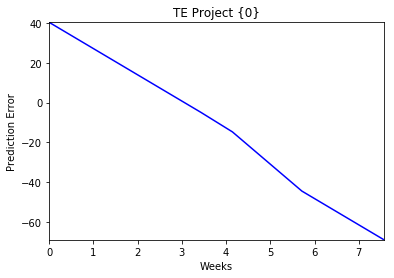

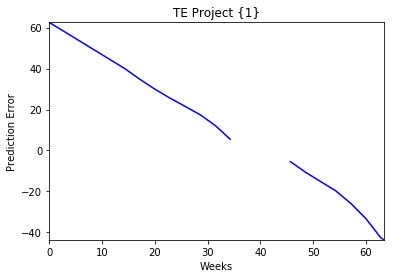

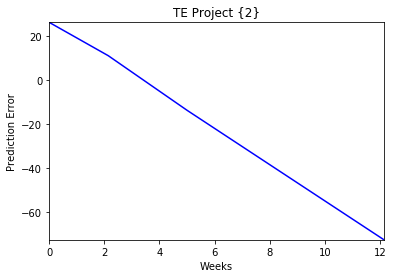

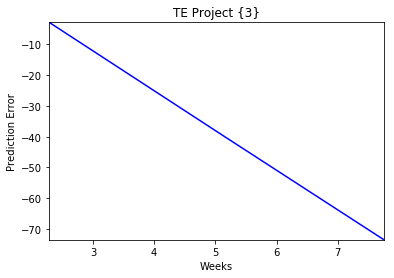

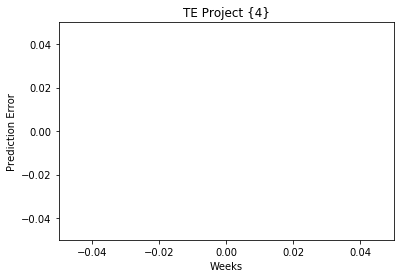

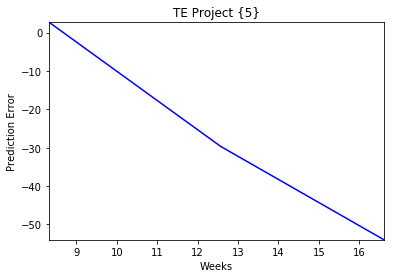

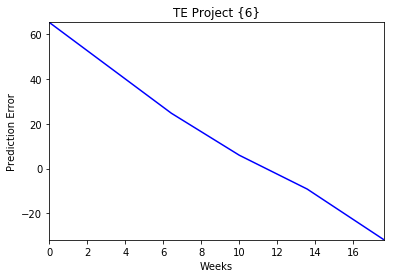

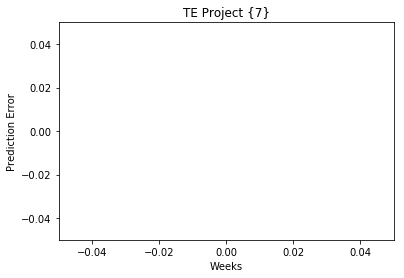

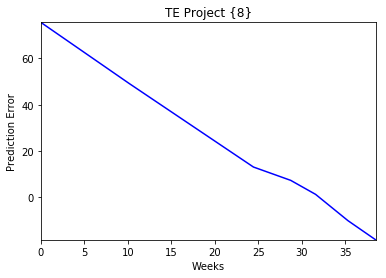

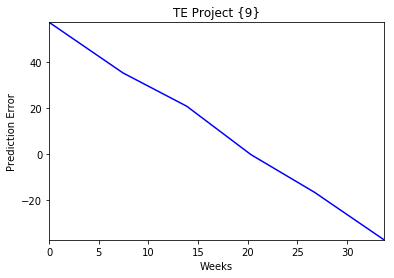

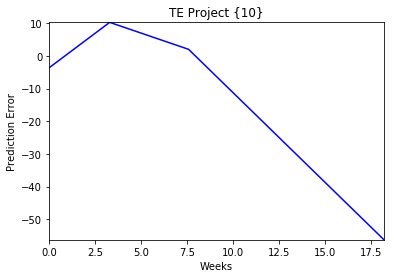

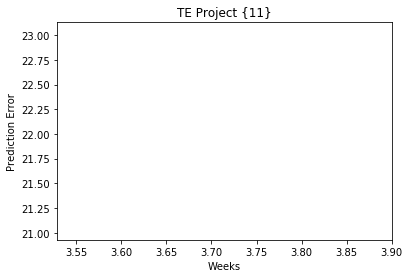

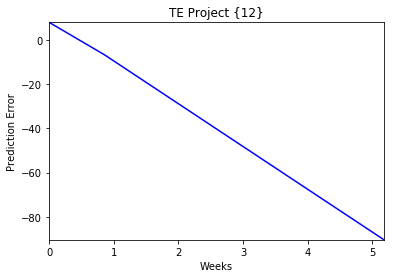

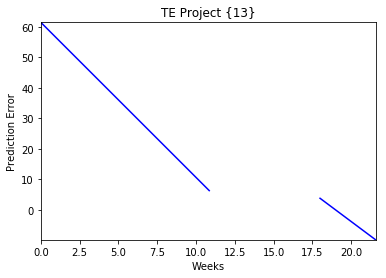

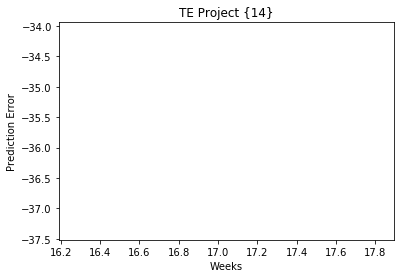

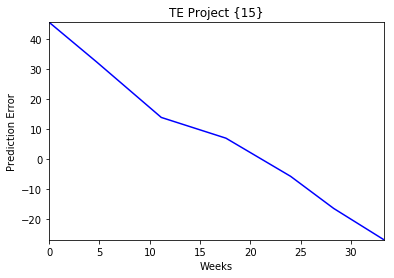

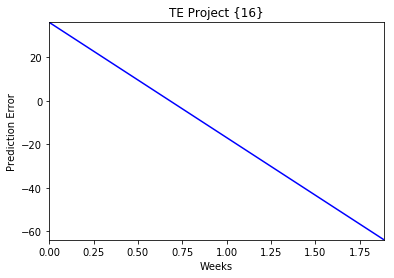

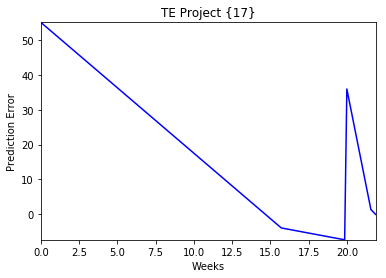

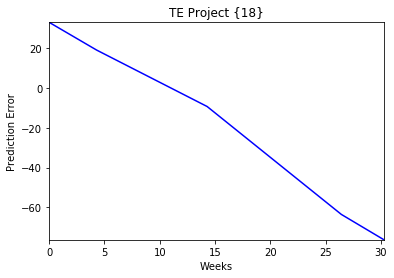

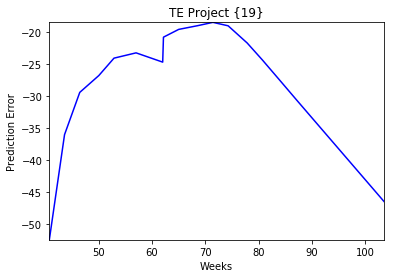

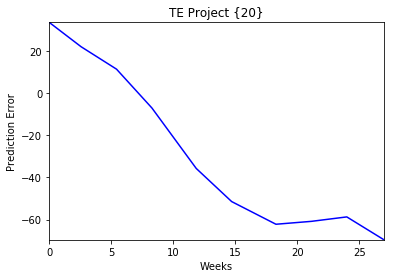

In [84]:
Te = []
for i in range(0, np.size(files)):
    Tex = []
    for j in range(0, np.size(ATNs[i])):
        m = (t_e[i][j]-t_e[i][0])/(ATNs[i][j]-ATNs[i][0]);
        a = t_e[i][j]-m*ATNs[i][j];
        Tez = (1.0-a)/m
        Tex.append(Tez)
    Te.append(Tex)

TEe = [[(DAC[i]-Te[i][t]*PD[i])/DAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]

Te1 = [[ATNs[i][t]-1/gammae[i][t]*np.log(-np.log(1.0/alphae[i][t])) for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]

TEe1 = [[(DAC[i]-Te1[i][t]*PD[i])/DAC[i]*100 for t in range(0, n_tracking_periods[i]+1)] for i in range(0, np.size(files))]

for i in range(0, np.size(files)):
    # plot gompertz
    plt.plot(t_x[i], TEe[i], 'r-', t_x[i], TEe1[i], 'b-')
    plt.title('TE Project {%d}'% i)
    plt.xlabel('Weeks')
    plt.ylabel('Prediction Error')
    plt.autoscale(tight='both')
    plt.show()

    